In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from collections import OrderedDict
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [3]:
user1_pos = (2.0, 3.75, 0.0)
user2_pos = (5.5, 4.5, 0.0)
user3_pos = (5.5, 3.0, 0.0)
robot_pos = (15.0, 3.75, 0.0)

targets_pos = np.array([[4.0, 3.8, 2.5], [4.0, 3.7, 2.5]])

<IPython.core.display.Javascript object>


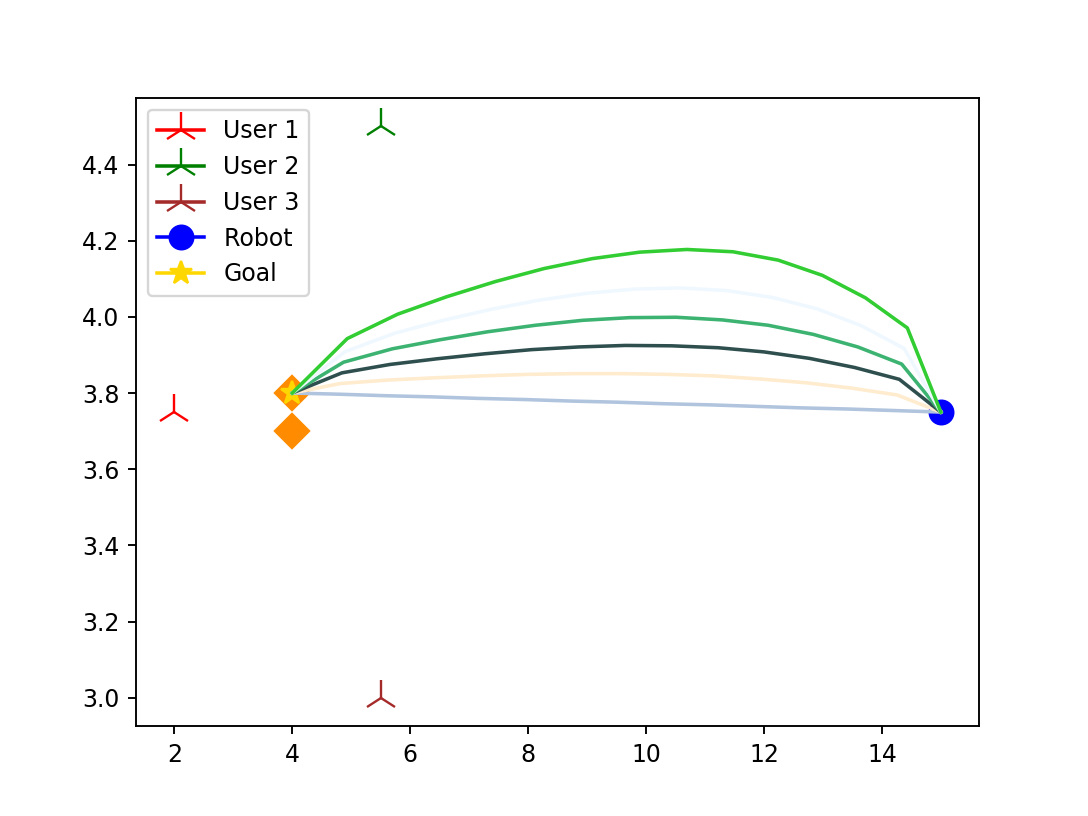

Legibilites Iteration 1:
User 1: 0.49894	User 2: 0.46404	User 3: 0.56859
Average: 0.51052

Legibilites Iteration 100:
User 1: 0.49895	User 2: 0.47488	User 3: 0.57793
Average: 0.51725

Legibilites Iteration 200:
User 1: 0.49896	User 2: 0.49142	User 3: 0.58489
Average: 0.52509

Legibilites Iteration 300:
User 1: 0.49898	User 2: 0.51735	User 3: 0.59029
Average: 0.53554

Legibilites Iteration 400:
User 1: 0.49899	User 2: 0.56200	User 3: 0.59483
Average: 0.55194

Legibilites Iteration 500:
User 1: 0.49900	User 2: 0.66340	User 3: 0.59955
Average: 0.58732

Legibilites Iteration 600:
User 1: nan	User 2: nan	User 3: nan
Average: nan

Legibilites Iteration 700:
User 1: nan	User 2: nan	User 3: nan
Average: nan

Legibilites Iteration 800:
User 1: nan	User 2: nan	User 3: nan
Average: nan

Legibilites Iteration 900:
User 1: nan	User 2: nan	User 3: nan
Average: nan

Legibilites Iteration 1000:
User 1: nan	User 2: nan	User 3: nan
Average: nan

Legibilites Iteration 2000:
User 1: nan	User 2: nan	User 3

In [4]:
reader = pd.read_csv('data/3_users_10000_1.csv')
trajectory = OrderedDict()
legibilities = OrderedDict()
for _, row in reader.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    leg_np = np.fromstring(row[2], dtype=float, sep=',')
    trajectory[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
    legibilities[int(row[0])] = leg_np

color_names = ['lightsteelblue','blanchedalmond','darkslategrey','mediumseagreen','aliceblue',
               'limegreen','peru','beige','lightgray','darkblue','deepskyblue','magenta',
               'black','darkmagenta','blue','hotpink','indigo','firebrick','orange','chocolate','tomato']
i = 0
fig = plt.figure(1)
plt.clf()
plt.plot(user1_pos[0], user1_pos[1], color='red', marker='2', markersize=15, label='User 1')
plt.plot(user2_pos[0], user2_pos[1], color='green', marker='2', markersize=15, label='User 2')
plt.plot(user3_pos[0], user3_pos[1], color='brown', marker='2', markersize=15, label='User 3')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='darkorange', marker='D', markersize=10)
plt.plot(targets_pos[1, 0], targets_pos[1, 1], color='darkorange', marker='D', markersize=10)
plt.plot(robot_pos[0], robot_pos[1], color='blue', marker='o', markersize=10, label='Robot')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='gold', marker='*', markersize=10, label='Goal')
keys = sorted(trajectory.keys())
for key in keys:
    legibility_vals = legibilities[key]
    print('Legibilites Iteration %i:\nUser 1: %.5f\tUser 2: %.5f\tUser 3: %.5f\nAverage: %.5f\n' % 
          (key, legibility_vals[0], legibility_vals[1], legibility_vals[2], legibility_vals[3]))
    #if key < 2000:
    traj = trajectory[key]
    plt.plot(traj[:, 0], traj[:, 1], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

<IPython.core.display.Javascript object>


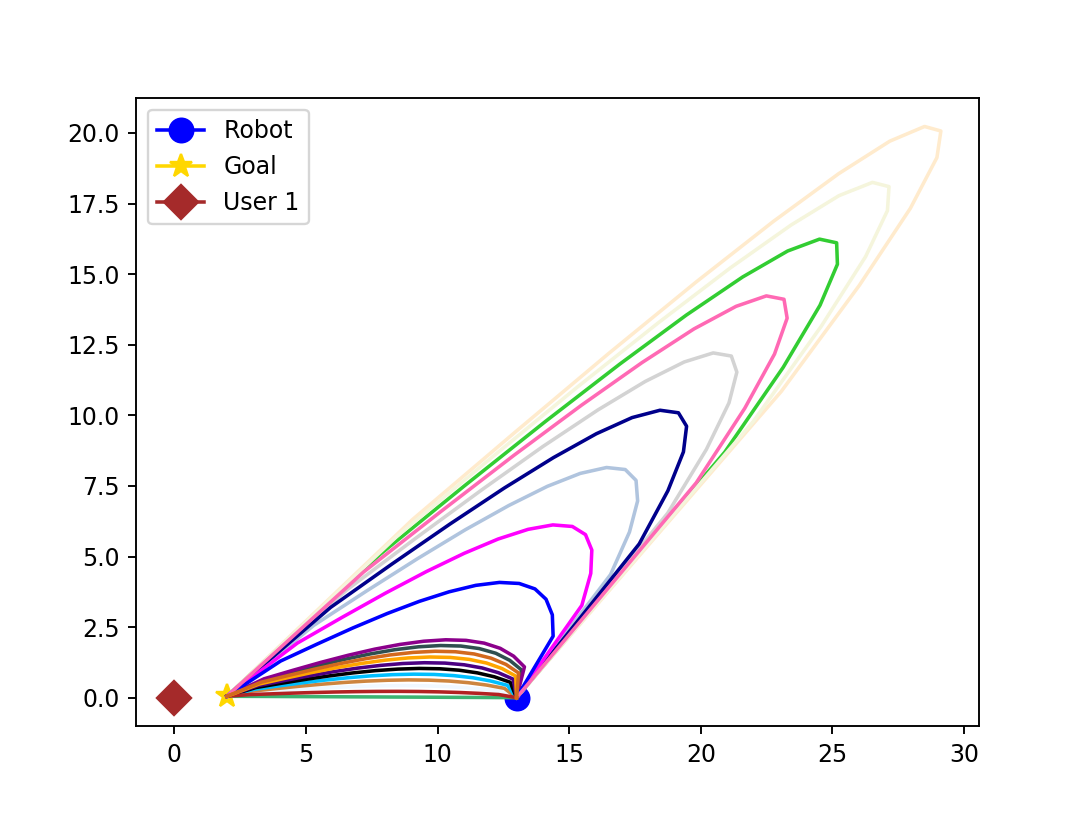

<IPython.core.display.Javascript object>


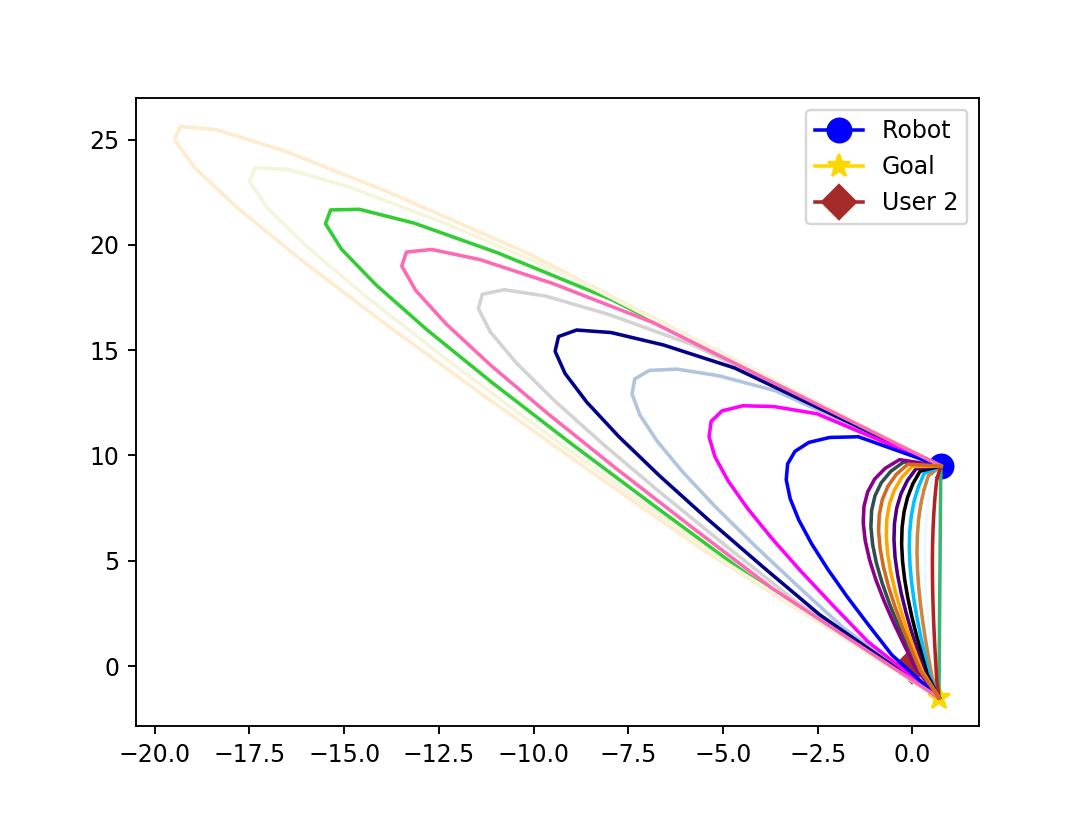

<IPython.core.display.Javascript object>


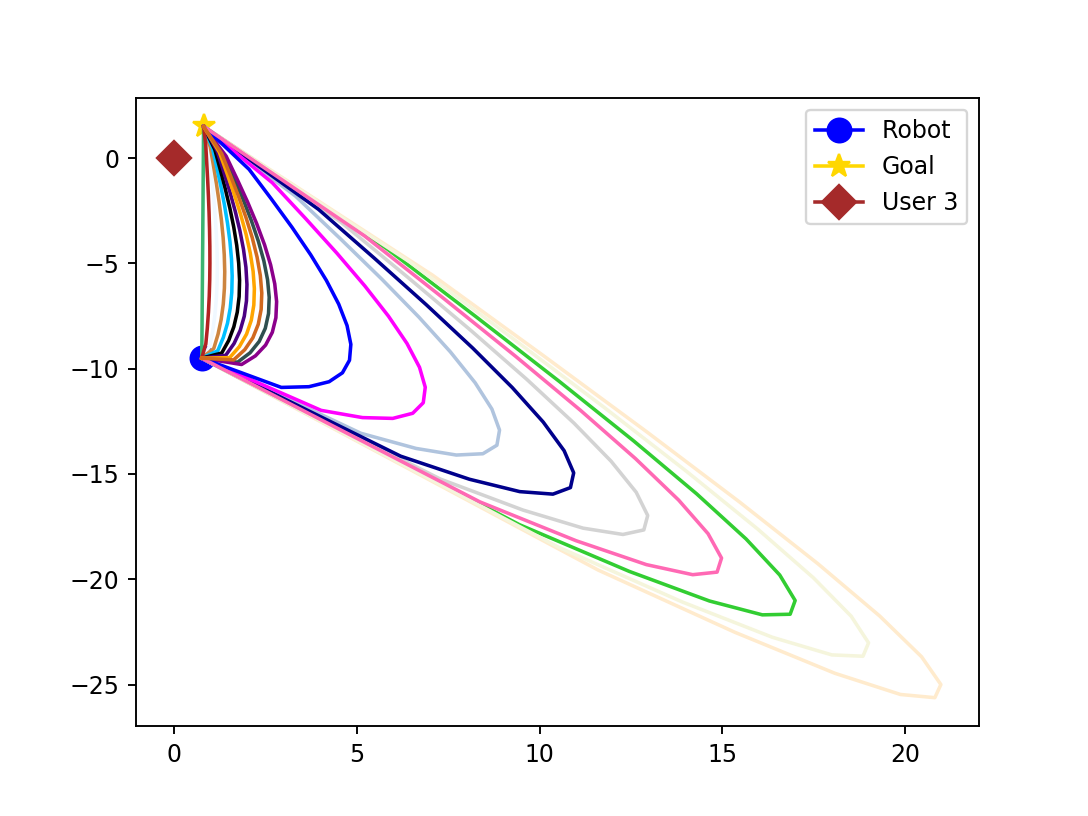

<IPython.core.display.Javascript object>


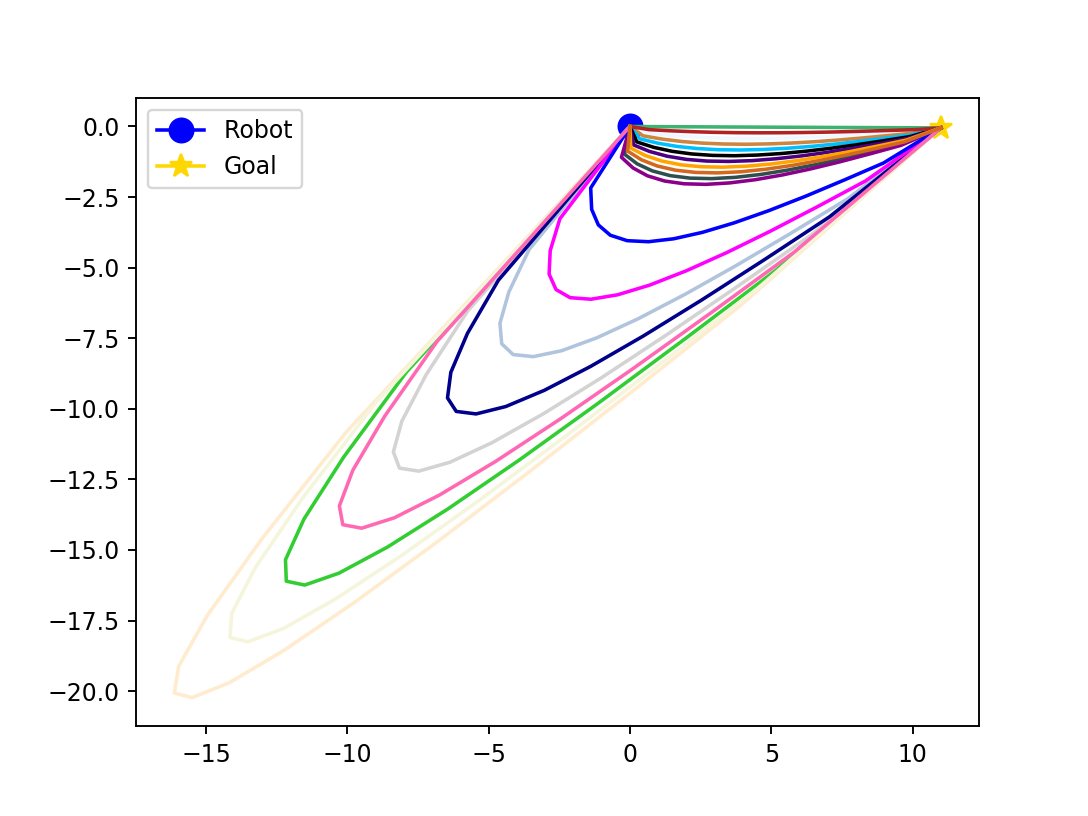

In [36]:
reader_u1 = pd.read_csv('data/3_users_10000_u1.csv', header=0)
reader_u2 = pd.read_csv('data/3_users_10000_u2.csv', header=0)
reader_u3 = pd.read_csv('data/3_users_10000_u3.csv', header=0)
reader_r = pd.read_csv('data/3_users_10000_r.csv', header=0)
u1_trajectories = OrderedDict()
for _, row in reader_u1.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    u1_trajectories[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
u2_trajectories = OrderedDict()
for _, row in reader_u2.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    u2_trajectories[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
u3_trajectories = OrderedDict()
for _, row in reader_u3.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    u3_trajectories[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
r_trajectories = OrderedDict()
for _, row in reader_r.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    r_trajectories[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))

color_names = ['lightsteelblue','blanchedalmond','darkslategrey','mediumseagreen','aliceblue',
               'limegreen','peru','beige','lightgray','darkblue','deepskyblue','magenta',
               'black','darkmagenta','blue','hotpink','indigo','firebrick','orange','chocolate','tomato']

i = 0
fig = plt.figure('User 1')
plt.clf()
plt.plot(u1_trajectories[1][0, 2], u1_trajectories[1][0, 0], 
         color='blue', marker='o', markersize=10, label='Robot')
plt.plot(u1_trajectories[1][-1, 2], u1_trajectories[1][-1, 0], 
         color='gold', marker='*', markersize=10, label='Goal')
plt.plot(0, 0, color='brown', marker='D', markersize=10, label='User 1')
for key in u1_trajectories.keys():
    #if key < 5000:
    traj = u1_trajectories[key]
    plt.plot(traj[:, 2], traj[:, 0], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

i = 0
fig = plt.figure('User 2')
plt.clf()
plt.plot(u2_trajectories[1][0, 2], u2_trajectories[1][0, 0], 
         color='blue', marker='o', markersize=10, label='Robot')
plt.plot(u2_trajectories[1][-1, 2], u2_trajectories[1][-1, 0], 
         color='gold', marker='*', markersize=10, label='Goal')
plt.plot(0, 0, color='brown', marker='D', markersize=10, label='User 2')
for key in u2_trajectories.keys():
    #if key < 5000:
    traj = u2_trajectories[key]
    plt.plot(traj[:, 2], traj[:, 0], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

i = 0
fig = plt.figure('User 3')
plt.clf()
plt.plot(u3_trajectories[1][0, 2], u3_trajectories[1][0, 0], 
         color='blue', marker='o', markersize=10, label='Robot')
plt.plot(u3_trajectories[1][-1, 2], u3_trajectories[1][-1, 0], 
         color='gold', marker='*', markersize=10, label='Goal')
plt.plot(0, 0, color='brown', marker='D', markersize=10, label='User 3')
for key in u3_trajectories.keys():
    #if key < 5000:
    traj = u3_trajectories[key]
    plt.plot(traj[:, 2], traj[:, 0], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

i = 0
fig = plt.figure('Robot')
plt.clf()
plt.plot(r_trajectories[1][0, 0], r_trajectories[1][0, 1], 
         color='blue', marker='o', markersize=10, label='Robot')
plt.plot(r_trajectories[1][-1, 0], r_trajectories[1][-1, 1], 
         color='gold', marker='*', markersize=10, label='Goal')
for key in r_trajectories.keys():
    #if key < 5000:
    traj = r_trajectories[key]
    plt.plot(traj[:, 0], traj[:, 1], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

<IPython.core.display.Javascript object>


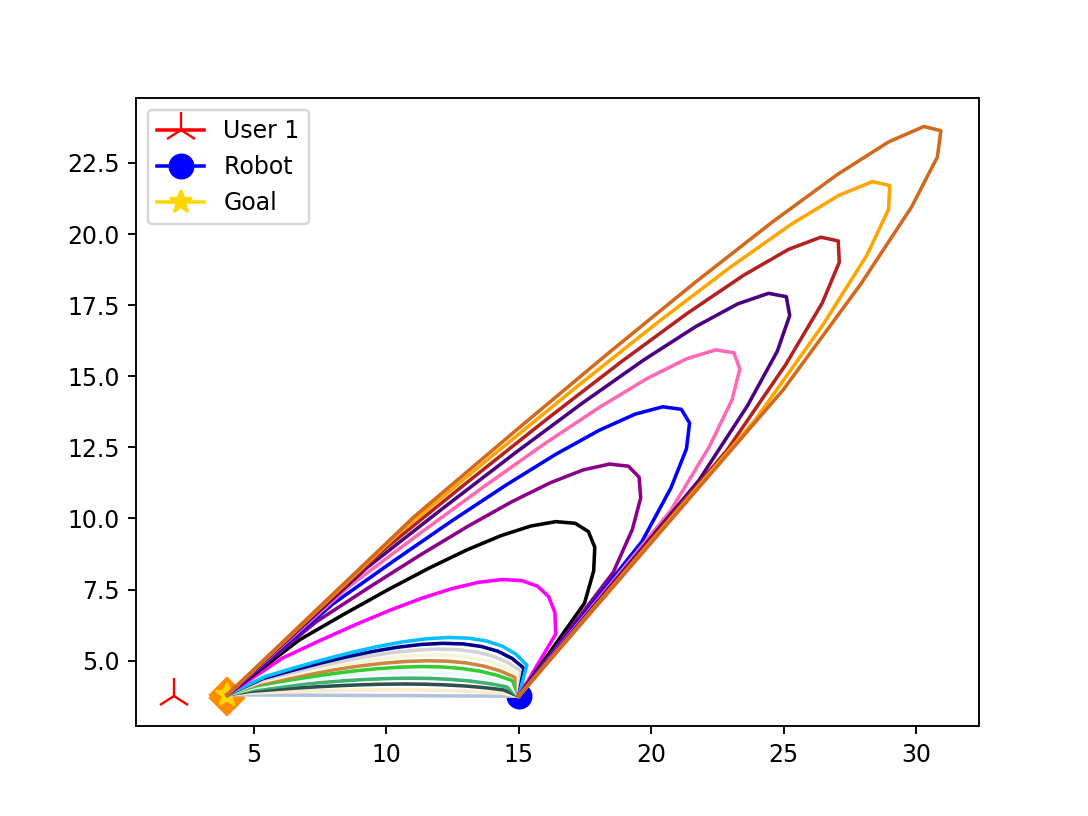

Legibility Iteration 1: 0.91866

Legibility Iteration 100: 0.91676

Legibility Iteration 200: 0.91485

Legibility Iteration 300: 0.91293

Legibility Iteration 400: 0.91102

Legibility Iteration 500: 0.90911

Legibility Iteration 600: 0.90720

Legibility Iteration 700: 0.90529

Legibility Iteration 800: 0.90338

Legibility Iteration 900: 0.90147

Legibility Iteration 1000: 0.89957

Legibility Iteration 2000: 0.88066

Legibility Iteration 3000: 0.86203

Legibility Iteration 4000: 0.84374

Legibility Iteration 5000: 0.82584

Legibility Iteration 6000: 0.80838

Legibility Iteration 7000: 0.79140

Legibility Iteration 8000: 0.77493

Legibility Iteration 9000: 0.75899

Legibility Iteration 10000: 0.74358



In [32]:
reader = pd.read_csv('data/user_1_10000.csv')
trajectory = OrderedDict()
legibilities = OrderedDict()
for _, row in reader.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    leg_np = np.fromstring(row[2], dtype=float, sep=', ')
    trajectory[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
    legibilities[int(row[0])] = leg_np

color_names = ['lightsteelblue','blanchedalmond','darkslategrey','mediumseagreen','aliceblue',
               'limegreen','peru','beige','lightgray','darkblue','deepskyblue','magenta',
               'black','darkmagenta','blue','hotpink','indigo','firebrick','orange','chocolate','tomato']
i = 0
fig = plt.figure(2)
plt.clf()
plt.plot(user1_pos[0], user1_pos[1], color='red', marker='2', markersize=15, label='User 1')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='darkorange', marker='D', markersize=10)
plt.plot(targets_pos[1, 0], targets_pos[1, 1], color='darkorange', marker='D', markersize=10)
plt.plot(robot_pos[0], robot_pos[1], color='blue', marker='o', markersize=10, label='Robot')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='gold', marker='*', markersize=10, label='Goal')
for key in sorted(trajectory.keys()):
    legibility_vals = legibilities[key]
    print('Legibility Iteration %i: %.5f\n' % (key, legibility_vals[0]))
    traj = trajectory[key]
    plt.plot(traj[:, 0], traj[:, 1], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

<IPython.core.display.Javascript object>


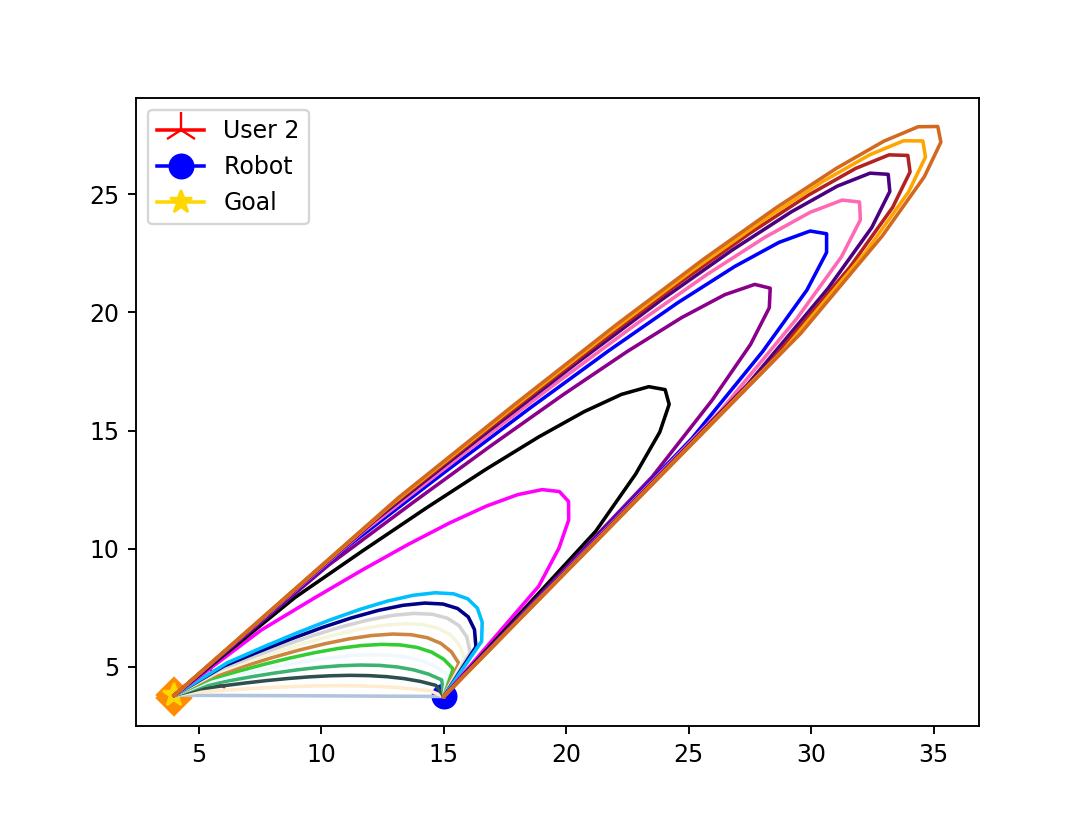

Legibility Iteration 1: 0.91690

Legibility Iteration 100: 0.91993

Legibility Iteration 200: 0.92299

Legibility Iteration 300: 0.92604

Legibility Iteration 400: 0.92910

Legibility Iteration 500: 0.93216

Legibility Iteration 600: 0.93522

Legibility Iteration 700: 0.93828

Legibility Iteration 800: 0.94134

Legibility Iteration 900: 0.94440

Legibility Iteration 1000: 0.94746

Legibility Iteration 2000: 0.97794

Legibility Iteration 3000: 1.00801

Legibility Iteration 4000: nan

Legibility Iteration 5000: nan

Legibility Iteration 6000: nan

Legibility Iteration 7000: nan

Legibility Iteration 8000: nan

Legibility Iteration 9000: nan

Legibility Iteration 10000: nan



In [33]:
reader = pd.read_csv('data/user_2_10000.csv')
trajectory = OrderedDict()
legibilities = OrderedDict()
for _, row in reader.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    leg_np = np.fromstring(row[2], dtype=float, sep=', ')
    trajectory[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
    legibilities[int(row[0])] = leg_np

color_names = ['lightsteelblue','blanchedalmond','darkslategrey','mediumseagreen','aliceblue',
               'limegreen','peru','beige','lightgray','darkblue','deepskyblue','magenta',
               'black','darkmagenta','blue','hotpink','indigo','firebrick','orange','chocolate','tomato']
i = 0
fig = plt.figure(3)
plt.clf()
plt.plot(user2_pos[0], user2_pos[1], color='red', marker='2', markersize=15, label='User 2')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='darkorange', marker='D', markersize=10)
plt.plot(targets_pos[1, 0], targets_pos[1, 1], color='darkorange', marker='D', markersize=10)
plt.plot(robot_pos[0], robot_pos[1], color='blue', marker='o', markersize=10, label='Robot')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='gold', marker='*', markersize=10, label='Goal')
for key in sorted(trajectory.keys()):
    legibility_vals = legibilities[key]
    print('Legibility Iteration %i: %.5f\n' % (key, legibility_vals[0]))
    traj = trajectory[key]
    plt.plot(traj[:, 0], traj[:, 1], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

<IPython.core.display.Javascript object>


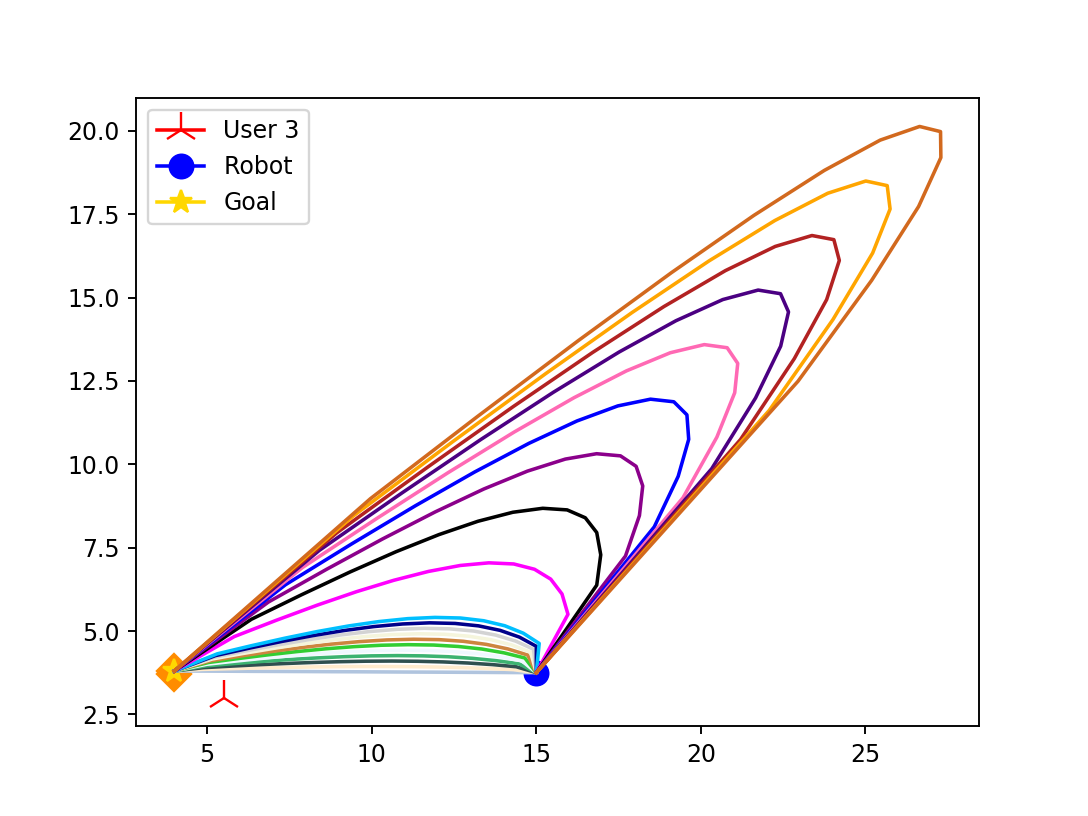

Legibility Iteration 1: 0.97511

Legibility Iteration 100: 0.97538

Legibility Iteration 200: 0.97566

Legibility Iteration 300: 0.97593

Legibility Iteration 400: 0.97621

Legibility Iteration 500: 0.97648

Legibility Iteration 600: 0.97675

Legibility Iteration 700: 0.97702

Legibility Iteration 800: 0.97730

Legibility Iteration 900: 0.97757

Legibility Iteration 1000: 0.97784

Legibility Iteration 2000: 0.98054

Legibility Iteration 3000: 0.98320

Legibility Iteration 4000: 0.98581

Legibility Iteration 5000: 0.98837

Legibility Iteration 6000: 0.99087

Legibility Iteration 7000: 0.99332

Legibility Iteration 8000: 0.99570

Legibility Iteration 9000: 0.99801

Legibility Iteration 10000: 1.00024



In [34]:
reader = pd.read_csv('data/user_3_10000.csv')
trajectory = OrderedDict()
legibilities = OrderedDict()
for _, row in reader.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    leg_np = np.fromstring(row[2], dtype=float, sep=', ')
    trajectory[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
    legibilities[int(row[0])] = leg_np

color_names = ['lightsteelblue','blanchedalmond','darkslategrey','mediumseagreen','aliceblue',
               'limegreen','peru','beige','lightgray','darkblue','deepskyblue','magenta',
               'black','darkmagenta','blue','hotpink','indigo','firebrick','orange','chocolate','tomato']
i = 0
fig = plt.figure(4)
plt.clf()
plt.plot(user3_pos[0], user3_pos[1], color='red', marker='2', markersize=15, label='User 3')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='darkorange', marker='D', markersize=10)
plt.plot(targets_pos[1, 0], targets_pos[1, 1], color='darkorange', marker='D', markersize=10)
plt.plot(robot_pos[0], robot_pos[1], color='blue', marker='o', markersize=10, label='Robot')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='gold', marker='*', markersize=10, label='Goal')
for key in sorted(trajectory.keys()):
    legibility_vals = legibilities[key]
    print('Legibility Iteration %i: %.5f\n' % (key, legibility_vals[0]))
    traj = trajectory[key]
    plt.plot(traj[:, 0], traj[:, 1], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

In [24]:
reader = pd.read_csv('data/2_users_1_2_10000.csv')
trajectory = OrderedDict()
legibilities = OrderedDict()
for _, row in reader.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    leg_np = np.fromstring(row[2], dtype=float, sep=', ')
    trajectory[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
    legibilities[int(row[0])] = leg_np

color_names = ['lightsteelblue','blanchedalmond','darkslategrey','mediumseagreen','aliceblue',
               'limegreen','peru','beige','lightgray','darkblue','deepskyblue','magenta',
               'black','darkmagenta','blue','hotpink','indigo','firebrick','orange','chocolate','tomato']
i = 0
fig = plt.figure(5)
plt.clf()
plt.plot(user1_pos[0], user1_pos[1], color='red', marker='2', markersize=15, label='User 1')
plt.plot(user2_pos[0], user2_pos[1], color='green', marker='2', markersize=15, label='User 2')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='darkorange', marker='D', markersize=10)
plt.plot(targets_pos[1, 0], targets_pos[1, 1], color='darkorange', marker='D', markersize=10)
plt.plot(robot_pos[0], robot_pos[1], color='blue', marker='o', markersize=10, label='Robot')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='gold', marker='*', markersize=10, label='Goal')
for key in sorted(trajectory.keys()):
    legibility_vals = legibilities[key]
    print('Legibility Iteration %i: %.5f\n' % (key, legibility_vals[0]))
    traj = trajectory[key]
    plt.plot(traj[:, 0], traj[:, 1], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

Legibility Iteration 1: 0.91866

Legibility Iteration 100: 0.91663

Legibility Iteration 200: 0.91457

Legibility Iteration 300: 0.91252

Legibility Iteration 400: 0.91047

Legibility Iteration 500: 0.90842

Legibility Iteration 600: 0.90637

Legibility Iteration 700: 0.90432

Legibility Iteration 800: 0.90227

Legibility Iteration 900: 0.90023

Legibility Iteration 1000: 0.89819

Legibility Iteration 2000: 0.87767

Legibility Iteration 3000: 0.85728

Legibility Iteration 4000: 0.83726

Legibility Iteration 5000: 0.81765

Legibility Iteration 6000: 0.79852

Legibility Iteration 7000: 0.77989

Legibility Iteration 8000: 0.76181

Legibility Iteration 9000: 0.74430

Legibility Iteration 10000: 0.72738



<IPython.core.display.Javascript object>


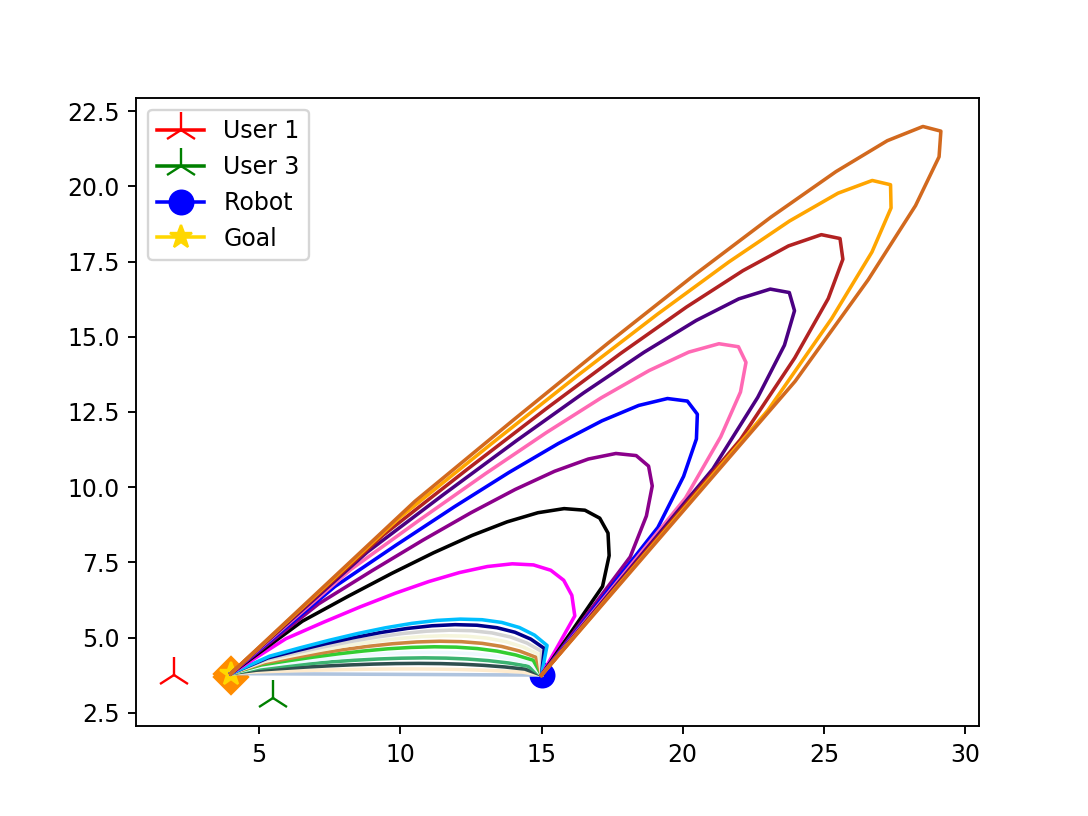

Legibility Iteration 1: 0.91866

Legibility Iteration 100: 0.91696

Legibility Iteration 200: 0.91523

Legibility Iteration 300: 0.91351

Legibility Iteration 400: 0.91178

Legibility Iteration 500: 0.91006

Legibility Iteration 600: 0.90834

Legibility Iteration 700: 0.90662

Legibility Iteration 800: 0.90490

Legibility Iteration 900: 0.90318

Legibility Iteration 1000: 0.90147

Legibility Iteration 2000: 0.88439

Legibility Iteration 3000: 0.86751

Legibility Iteration 4000: 0.85085

Legibility Iteration 5000: 0.83446

Legibility Iteration 6000: 0.81837

Legibility Iteration 7000: 0.80261

Legibility Iteration 8000: 0.78720

Legibility Iteration 9000: 0.77217

Legibility Iteration 10000: 0.75753



In [25]:
reader = pd.read_csv('data/2_users_1_3_10000.csv')
trajectory = OrderedDict()
legibilities = OrderedDict()
for _, row in reader.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    leg_np = np.fromstring(row[2], dtype=float, sep=', ')
    trajectory[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
    legibilities[int(row[0])] = leg_np

color_names = ['lightsteelblue','blanchedalmond','darkslategrey','mediumseagreen','aliceblue',
               'limegreen','peru','beige','lightgray','darkblue','deepskyblue','magenta',
               'black','darkmagenta','blue','hotpink','indigo','firebrick','orange','chocolate','tomato']
i = 0
fig = plt.figure(6)
plt.clf()
plt.plot(user1_pos[0], user1_pos[1], color='red', marker='2', markersize=15, label='User 1')
plt.plot(user3_pos[0], user3_pos[1], color='green', marker='2', markersize=15, label='User 3')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='darkorange', marker='D', markersize=10)
plt.plot(targets_pos[1, 0], targets_pos[1, 1], color='darkorange', marker='D', markersize=10)
plt.plot(robot_pos[0], robot_pos[1], color='blue', marker='o', markersize=10, label='Robot')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='gold', marker='*', markersize=10, label='Goal')
for key in sorted(trajectory.keys()):
    legibility_vals = legibilities[key]
    print('Legibility Iteration %i: %.5f\n' % (key, legibility_vals[0]))
    traj = trajectory[key]
    plt.plot(traj[:, 0], traj[:, 1], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

<IPython.core.display.Javascript object>


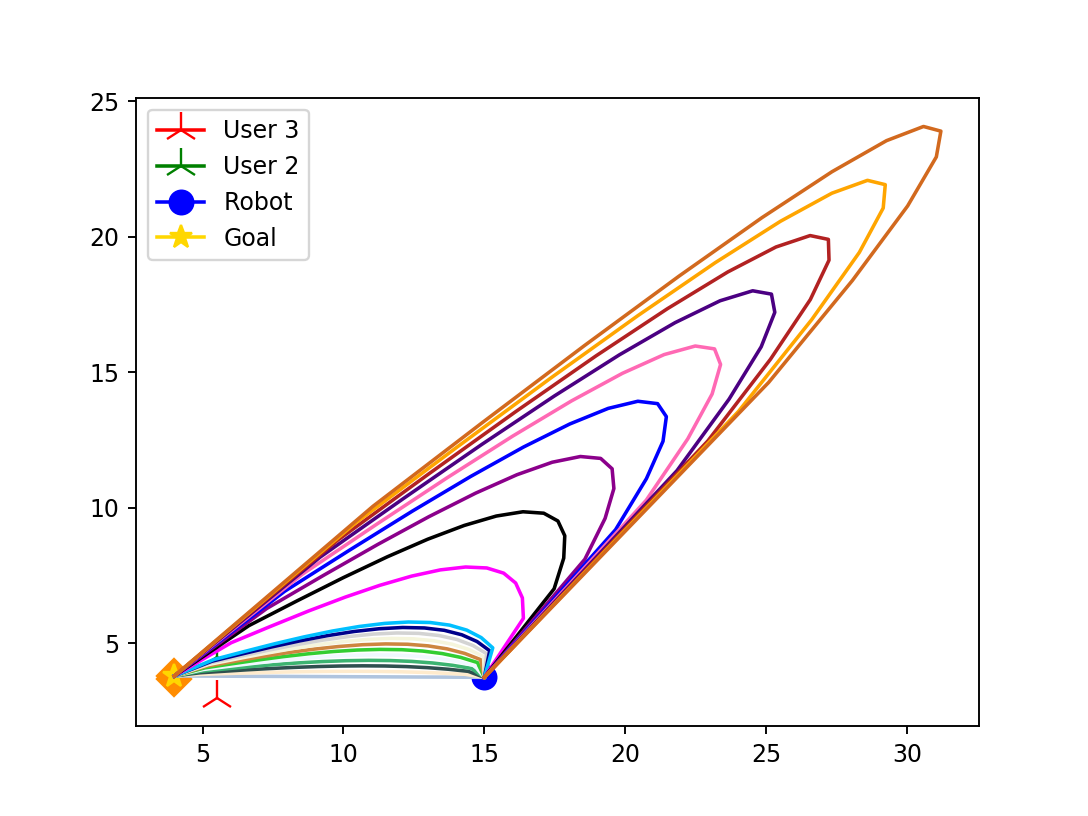

Legibility Iteration 1: 0.94772

Legibility Iteration 100: 0.94805

Legibility Iteration 200: 0.94838

Legibility Iteration 300: 0.94871

Legibility Iteration 400: 0.94904

Legibility Iteration 500: 0.94937

Legibility Iteration 600: 0.94970

Legibility Iteration 700: 0.95002

Legibility Iteration 800: 0.95035

Legibility Iteration 900: 0.95068

Legibility Iteration 1000: 0.95101

Legibility Iteration 2000: 0.95435

Legibility Iteration 3000: 0.95774

Legibility Iteration 4000: 0.96108

Legibility Iteration 5000: 0.96437

Legibility Iteration 6000: 0.96760

Legibility Iteration 7000: 0.97076

Legibility Iteration 8000: 0.97383

Legibility Iteration 9000: 0.97681

Legibility Iteration 10000: 0.97964



In [26]:
reader = pd.read_csv('data/2_users_2_3_10000.csv')
trajectory = OrderedDict()
legibilities = OrderedDict()
for _, row in reader.iterrows():
    row_np = np.fromstring(row[1], dtype=float, sep=' ')
    leg_np = np.fromstring(row[2], dtype=float, sep=', ')
    trajectory[int(row[0])] = row_np.reshape((int(len(row_np)/3), 3))
    legibilities[int(row[0])] = leg_np

color_names = ['lightsteelblue','blanchedalmond','darkslategrey','mediumseagreen','aliceblue',
               'limegreen','peru','beige','lightgray','darkblue','deepskyblue','magenta',
               'black','darkmagenta','blue','hotpink','indigo','firebrick','orange','chocolate','tomato']
i = 0
fig = plt.figure(7)
plt.clf()
plt.plot(user3_pos[0], user3_pos[1], color='red', marker='2', markersize=15, label='User 3')
plt.plot(user2_pos[0], user2_pos[1], color='green', marker='2', markersize=15, label='User 2')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='darkorange', marker='D', markersize=10)
plt.plot(targets_pos[1, 0], targets_pos[1, 1], color='darkorange', marker='D', markersize=10)
plt.plot(robot_pos[0], robot_pos[1], color='blue', marker='o', markersize=10, label='Robot')
plt.plot(targets_pos[0, 0], targets_pos[0, 1], color='gold', marker='*', markersize=10, label='Goal')
for key in sorted(trajectory.keys()):
    legibility_vals = legibilities[key]
    print('Legibility Iteration %i: %.5f\n' % (key, legibility_vals[0]))
    traj = trajectory[key]
    plt.plot(traj[:, 0], traj[:, 1], color=color_names[i], markersize=5)
    i += 1

plt.legend(loc='best')
fig.show()

In [2]:
trajectories = np.array([
    [[1500., 2500., 250.],
     [1293.407661758, 2461.581483147, 227.77104721],
     [1207.181122211, 2417.336475339, 230.119698167],
     [1134.812295956, 2373.092303627, 241.38706006],
     [1074.782676918, 2328.336485673, 260.449432575],
     [1025.871676095, 2282.664475483, 285.728057065],
     [987.12348675, 2235.792652797, 315.361996137],
     [957.787898961, 2187.553068289, 347.337783289],
     [937.255258996, 2137.877675625, 379.572497253],
     [924.997564298, 2086.776761057, 409.960217423],
     [920.52193816, 2034.314325198, 436.398752632],
     [923.340278127, 1980.582425283, 456.817965122],
     [932.957948127, 1925.677026019, 469.236549401],
     [948.880391168, 1869.679232874, 471.883183496],
     [970.622728016, 1812.645766377, 463.430319483],
     [997.680085642, 1754.609637817, 443.394123316],
     [1029.386629782, 1695.591455528, 412.717480759],
     [1064.605934447, 1635.637631325, 374.396110062],
     [1101.477221454, 1574.998627378, 333.154340096],
     [1200., 1500., 250.]],
    [[1500., 2500., 250.],
     [1302.844354227, 2442.665204086, 264.582014294],
     [1214.2561856, 2388.519638027, 303.321853876],
     [1138.239102617, 2334.559879908, 344.894160591],
     [1075.136955875, 2280.715101636, 388.004163644],
     [1024.993871177, 2227.042849923, 431.312246396],
     [987.519187851, 2173.683187823, 473.332760599],
     [962.08364877, 2120.788897959, 512.392496867],
     [947.738071978, 2068.449671181, 546.677898334],
     [943.255358806, 2016.631543936, 574.36485305],
     [947.20452095, 1965.156791431, 593.788771249],
     [958.057005506, 1913.746158771, 603.586232288],
     [974.302411483, 1862.120047955, 602.742139632],
     [994.540916949, 1810.118849252, 590.514815636],
     [1017.546606473, 1757.794012484, 566.258731853],
     [1042.341849371, 1705.445272002, 529.222975812],
     [1068.341427169, 1653.577431617, 478.604038381],
     [1095.491132748, 1602.64464602, 414.679747237],
     [1123.622296681, 1552.310775196, 342.647350887],
     [1200., 1500., 250.]],
    [[1500., 2500., 250.],
     [1354.284097421, 2445.637754758, 283.455051847],
     [1259.080481677, 2392.596558903, 304.451757507],
     [1172.065402103, 2339.59827928, 328.542180922],
     [1094.032543701, 2286.486687795, 355.562170098],
     [1025.632043851, 2233.169960897, 384.878365999],
     [967.418990463, 2179.65136643, 415.249281538],
     [919.91208173, 2126.045329664, 444.772941374],
     [883.633197115, 2072.564533418, 470.992092362],
     [859.093736461, 2019.466291206, 491.213804691],
     [846.705250905, 1966.961311478, 503.033269141],
     [846.626496123, 1915.116187079, 504.924149115],
     [858.6051584, 1863.804531541, 496.635927685],
     [881.893241954, 1812.746962147, 479.170577118],
     [915.27719371, 1761.621948277, 454.359483391],
     [957.192161887, 1710.182280852, 424.313163333],
     [1005.855754822, 1658.323912617, 391.008352173],
     [1059.385836355, 1606.098608499, 356.072984225],
     [1115.920121195, 1553.685136818, 320.651983502],
     [1200., 1500., 250.]],
    [[1500., 2500., 250.],
     [1185.337753341, 2498.910041125, 127.551148069],
     [1104.29029115, 2473.946743345, 108.252439697],
     [1040.778314054, 2446.988699215, 110.694081193],
     [988.621641624, 2417.307550635, 129.404691245],
     [944.345134123, 2384.588778273, 160.271874299],
     [906.178525642, 2348.691965591, 200.176716629],
     [873.438767837, 2309.535901268, 246.531159342],
     [846.139225875, 2267.054262359, 296.909733523],
     [824.73743493, 2221.183363974, 348.79349175],
     [809.965950806, 2171.861185513, 399.396735434],
     [802.704545946, 2119.026673052, 445.550280983],
     [803.860437614, 2062.608714179, 483.644870202],
     [814.233830241, 2002.48874837, 509.704511997],
     [834.362196196, 1938.424865662, 519.788712447],
     [864.343933267, 1869.968064249, 511.119781921],
     [903.558881863, 1796.512161485, 484.309796054],
     [949.995140424, 1717.845044495, 444.490643235],
     [999.736147485, 1635.493868593, 396.609404575],
     [1200., 1500., 250.]],
    [[1500., 2500., 250.],
     [1160.366094429, 2342.454246246, 413.652112871],
     [991.471691292, 2238.759862477, 533.253747636],
     [849.157688027, 2136.701531616, 660.493265145],
     [735.180639921, 2039.329316348, 790.015824897],
     [649.91694142, 1952.164695828, 909.231564002],
     [591.681567022, 1880.44442964, 1003.712869306],
     [558.064571668, 1823.608002428, 1069.956144695],
     [545.920862742, 1777.01288768, 1111.010127893],
     [553.59078341, 1737.532186761, 1129.84050085],
     [581.732594212, 1704.819511418, 1127.881390831],
     [621.51702206, 1673.150366257, 1108.09100507],
     [670.665903795, 1642.32070073, 1070.986944422],
     [727.361383355, 1612.751295393, 1016.502709593],
     [790.059266816, 1584.947406862, 944.176489522],
     [857.55329082, 1559.277431458, 853.222262131],
     [929.028938413, 1535.890641301, 742.584002238],
     [1004.050630568, 1514.771503887, 610.391570714],
     [1083.152343173, 1496.311838458, 451.137002101],
     [1200., 1500., 250.]],
    [[1500., 2500., 250.],
     [1183.487986475, 2445.772421582, 285.196142079],
     [1073.045241265, 2393.737738974, 339.791206126],
     [983.724277325, 2342.271939326, 399.828547798],
     [915.45500621, 2291.578714059, 462.390316283],
     [867.587228115, 2242.005179435, 523.99165576],
     [838.764395268, 2193.860642891, 580.799989712],
     [826.885308886, 2147.197679349, 629.135583796],
     [829.196430874, 2101.609681915, 666.093537935],
     [842.55875372, 2056.193821497, 689.953655252],
     [863.837954391, 2009.812598084, 700.117988178],
     [890.241955337, 1961.505014498, 696.73442062],
     [919.480408324, 1910.746802515, 680.348245557],
     [949.768826164, 1857.476170895, 651.671236814],
     [979.757881878, 1802.008876837, 611.34847162],
     [1008.46447572, 1744.978321173, 559.567597775],
     [1035.331932185, 1687.351576461, 495.517406847],
     [1060.573880855, 1630.244230524, 418.143719963],
     [1084.472673909, 1573.55252829, 333.065647434],
     [1200., 1500., 250.]],
    [[1500., 2500., 250.],
     [1380.871182369, 2399.456010921, 303.209837029],
     [1296.198472562, 2299.844882853, 332.776061511],
     [1217.852302571, 2202.861623374, 364.430155982],
     [1146.605141213, 2109.511877266, 397.779989924],
     [1083.112703333, 2020.70471456, 431.770310278],
     [1028.0176202, 1937.298335054, 464.490892175],
     [982.081076722, 1860.154438417, 493.183888502],
     [946.249853888, 1790.151614415, 514.66072138],
     [921.528492062, 1728.097616823, 526.220751603],
     [908.615414773, 1674.53956484, 526.723321505],
     [907.516594813, 1629.596656499, 516.987453835],
     [917.481738163, 1592.963876014, 499.093863921],
     [937.280787156, 1564.048138451, 475.306658367],
     [965.508717173, 1542.081846732, 447.46682137],
     [1000.736409123, 1526.162215235, 416.911259965],
     [1041.543152519, 1515.258780201, 384.60592],
     [1086.509233547, 1508.227529713, 351.292578212],
     [1134.213809863, 1503.838416054, 317.580191089],
     [1200., 1500., 250.]],
    [[1500., 2500., 250.],
     [1207.266322933, 2448.54311258, 160.085320811],
     [1130.359417916, 2375.136762107, 156.602745625],
     [1065.089647018, 2302.558408879, 175.359578047],
     [1006.263673948, 2231.322084668, 210.398803222],
     [952.421877572, 2162.258736884, 256.51665767],
     [904.130002962, 2096.228008075, 309.104529702],
     [862.808652504, 2033.963776179, 364.007317638],
     [830.005679854, 1975.98395304, 417.518432287],
     [806.988766839, 1922.534309554, 466.441676963],
     [794.55375205, 1873.566928308, 508.130512032],
     [792.970932481, 1828.760814334, 540.451942553],
     [802.007152179, 1787.581257383, 561.683763492],
     [820.969576257, 1749.361217954, 570.413760328],
     [848.732566849, 1713.386840919, 565.534538519],
     [883.74160148, 1678.979341585, 546.423491961],
     [924.050788667, 1645.563746614, 513.557079991],
     [967.486378572, 1612.736965023, 470.189614881],
     [1011.640782405, 1580.664306156, 420.305411008],
     [1200., 1500., 250.]],
])
user1_translation = (1500.0, 1000.0, 1000.0)
user2_translation = (500.0, 1500.0, 1000.0)
user3_translation = (2500.0, 1500.0, 1000.0)
robot_translation = (1500.0, 2500.0, 250.0)
targets = {'A': np.array([1200.0, 1500.0, 250.0]), 'B': np.array([1500.0, 1500.0, 250.0]),
           'C': np.array([1800.0, 1500.0, 250.0])}
colors = ['black', 'blue', 'green', 'cyan', 'red', 'orange', 'brown', 'pink']
names = ['Base', 'Height', 'Right', 'Left', 'Right Height', 'Left Height', 'Right Spring', 'Left Spring']

<IPython.core.display.Javascript object>


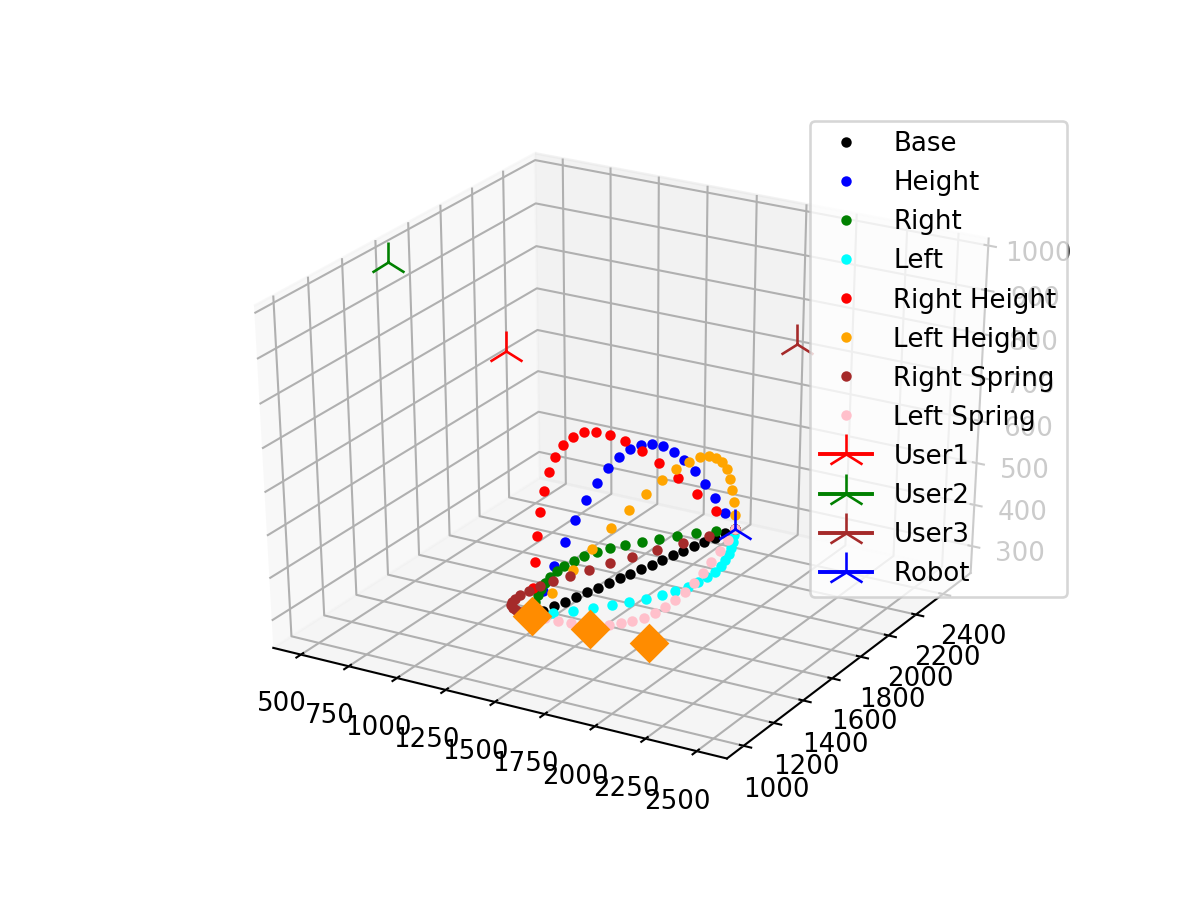

In [3]:
n_points = 20
optim_target = 'A'
traj_x = np.linspace(robot_translation[0], targets[optim_target][0], num=n_points)[:, None]
traj_y = np.linspace(robot_translation[1], targets[optim_target][1], num=n_points)[:, None]
traj_z = np.linspace(targets[optim_target][2], targets[optim_target][2], num=n_points)[:, None]
offset_modulator = 300 * np.sin(np.linspace(0, np.pi, num=n_points))[:, None]

base_traj = np.hstack((traj_x, traj_y, traj_z))
h_mod_traj = np.hstack((traj_x, traj_y, traj_z + offset_modulator))
r_mod_traj = np.hstack((traj_x - offset_modulator, traj_y, traj_z))
l_mod_traj = np.hstack((traj_x + offset_modulator, traj_y, traj_z))
hr_mod_traj = np.hstack((traj_x - offset_modulator, traj_y, traj_z + offset_modulator))
hl_mod_traj = np.hstack((traj_x + offset_modulator, traj_y, traj_z + offset_modulator))
r_spring_mod_traj = np.hstack((traj_x - offset_modulator, traj_y - offset_modulator, traj_z))
l_spring_mod_traj = np.hstack((traj_x + offset_modulator, traj_y - offset_modulator, traj_z))

fig = plt.figure('Trajectories Visual')
ax = fig.add_subplot(111, projection=Axes3D.name)
ax.plot(base_traj[:, 0], base_traj[:, 1], base_traj[:, 2], 'black', label='Base', marker='.',
        linestyle="None")
ax.plot(h_mod_traj[:, 0], h_mod_traj[:, 1], h_mod_traj[:, 2], 'blue', label='Height', marker='.',
        linestyle="None")
ax.plot(r_mod_traj[:, 0], r_mod_traj[:, 1], r_mod_traj[:, 2], 'green', label='Right', marker='.',
        linestyle="None")
ax.plot(l_mod_traj[:, 0], l_mod_traj[:, 1], l_mod_traj[:, 2], 'cyan', label='Left', marker='.',
        linestyle="None")
ax.plot(hr_mod_traj[:, 0], hr_mod_traj[:, 1], hr_mod_traj[:, 2], 'red', label='Right Height', marker='.',
        linestyle="None")
ax.plot(hl_mod_traj[:, 0], hl_mod_traj[:, 1], hl_mod_traj[:, 2], 'orange', label='Left Height', marker='.',
        linestyle="None")
ax.plot(r_spring_mod_traj[:, 0], r_spring_mod_traj[:, 1], r_spring_mod_traj[:, 2], 'brown', label='Right Spring',
        marker='.', linestyle="None")
ax.plot(l_spring_mod_traj[:, 0], l_spring_mod_traj[:, 1], l_spring_mod_traj[:, 2], 'pink', label='Left Spring',
        marker='.', linestyle="None")
ax.plot(np.array([user1_translation[0]]), np.array([user1_translation[1]]), np.array([user1_translation[2]]),
        color='red', marker='2', markersize=15, label='User1')
ax.plot(np.array([user2_translation[0]]), np.array([user2_translation[1]]), np.array([user2_translation[2]]),
        color='green', marker='2', markersize=15, label='User2')
ax.plot(np.array([user3_translation[0]]), np.array([user3_translation[1]]), np.array([user3_translation[2]]),
        color='brown', marker='2', markersize=15, label='User3')
ax.plot(np.array([robot_translation[0]]), np.array([robot_translation[1]]), np.array([robot_translation[2]]),
        color='blue', marker='2', markersize=15, label='Robot')
ax.plot(np.array([targets['A'][0]]), np.array([targets['A'][1]]), np.array([targets['A'][2]]),
        color='darkorange', marker='D', markersize=10)
ax.plot(np.array([targets['B'][0]]), np.array([targets['B'][1]]), np.array([targets['B'][2]]),
        color='darkorange', marker='D', markersize=10)
ax.plot(np.array([targets['C'][0]]), np.array([targets['C'][1]]), np.array([targets['C'][2]]),
        color='darkorange', marker='D', markersize=10)
plt.legend(loc='best')
fig.show()

<IPython.core.display.Javascript object>


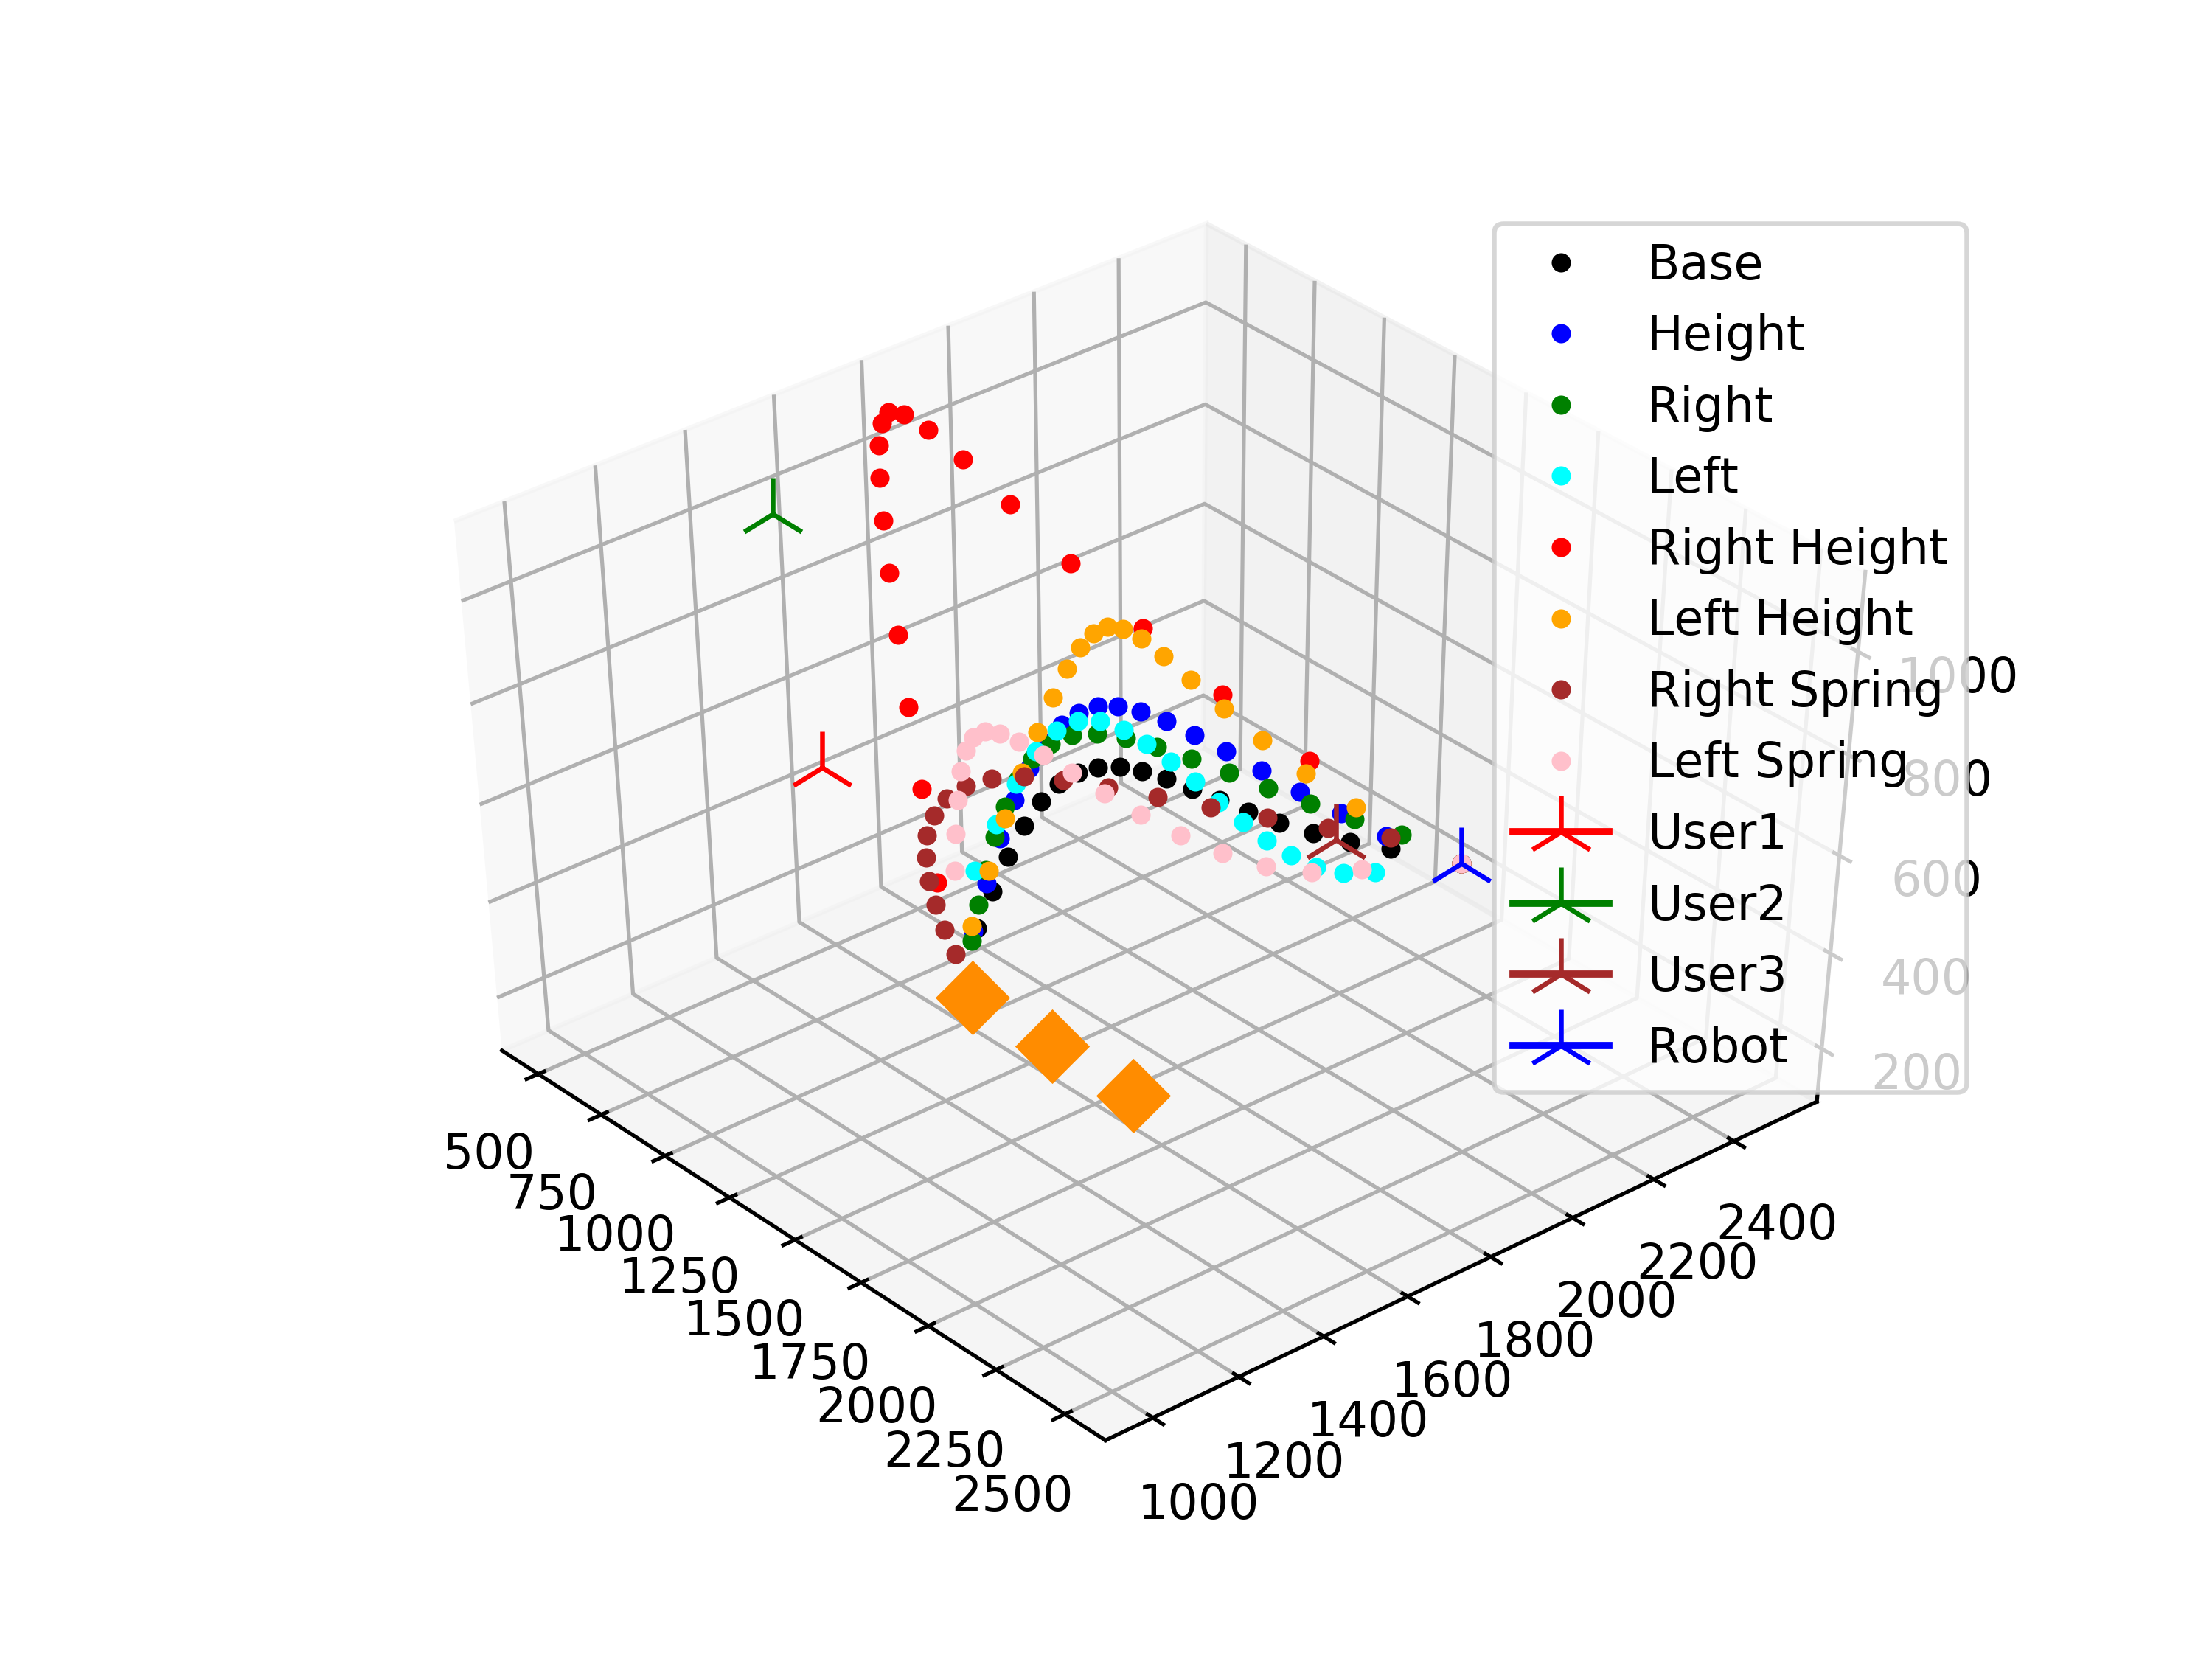

In [4]:
fig = plt.figure('Optimal Trajectories Visual')
ax = fig.add_subplot(111, projection=Axes3D.name)
for i in range(len(colors)):
    ax.plot(trajectories[i][:, 0], trajectories[i][:, 1], trajectories[i][:, 2], colors[i], label=names[i], marker='.',
            linestyle="None")
ax.plot(np.array([user1_translation[0]]), np.array([user1_translation[1]]), np.array([user1_translation[2]]),
        color='red', marker='2', markersize=15, label='User1')
ax.plot(np.array([user2_translation[0]]), np.array([user2_translation[1]]), np.array([user2_translation[2]]),
        color='green', marker='2', markersize=15, label='User2')
ax.plot(np.array([user3_translation[0]]), np.array([user3_translation[1]]), np.array([user3_translation[2]]),
        color='brown', marker='2', markersize=15, label='User3')
ax.plot(np.array([robot_translation[0]]), np.array([robot_translation[1]]), np.array([robot_translation[2]]),
        color='blue', marker='2', markersize=15, label='Robot')
ax.plot(np.array([targets['A'][0]]), np.array([targets['A'][1]]), np.array([targets['A'][2]]),
        color='darkorange', marker='D', markersize=10)
ax.plot(np.array([targets['B'][0]]), np.array([targets['B'][1]]), np.array([targets['B'][2]]),
        color='darkorange', marker='D', markersize=10)
ax.plot(np.array([targets['C'][0]]), np.array([targets['C'][1]]), np.array([targets['C'][2]]),
        color='darkorange', marker='D', markersize=10)
plt.legend(loc='best')
fig.show()

In [4]:
movements ={ 
            'conf_1' : { 
                'A' : {
                    'all_users' : np.array([[1500., 160., 2400.],
                                            [1619.503525779, 288.537908322, 2350.536096482],
                                            [1675.397065052, 356.172359955, 2308.749520789],
                                            [1724.772357537, 421.037706751, 2268.096166786],
                                            [1768.050482273, 480.966165992, 2228.626892636],
                                            [1805.445774542, 534.344819237, 2190.339153317],
                                            [1837.029724312, 579.983255534, 2153.181836686],
                                            [1862.797522333, 616.981926776, 2117.060973664],
                                            [1882.736946321, 644.608469443, 2081.847106305],
                                            [1896.893998475, 662.190946799, 2047.384681491],
                                            [1905.425926083, 669.036866069, 2013.503357706],
                                            [1908.630791616, 664.384756953, 1980.030614552],
                                            [1906.944114045, 647.391248541, 1946.804646942],
                                            [1900.896988923, 617.15186494, 1913.686329053],
                                            [1891.035235264, 572.750175286, 1880.569107605],
                                            [1877.803932654, 513.331781148, 1847.385962315],
                                            [1861.407569141, 438.221098036, 1814.112786453],
                                            [1841.686911482, 347.215067953, 1780.766852871],
                                            [1818.341145814, 241.969680403, 1747.393509262],
                                            [1800., 160., 1700.]]),
                    
                    'user_1' : np.array([[1500., 160., 2400.],
                                        [1799.149017354, 140.11092606, 2475.954438182],
                                        [1932.704050669, 130.587164415, 2493.124269191],
                                        [2050.301729622, 121.686866254, 2506.758263075],
                                        [2151.994569043, 113.592671433, 2515.820617744],
                                        [2237.862269745, 106.466845381, 2519.391080222],
                                        [2308.016295983, 100.45096918, 2516.666704288],
                                        [2362.605732961, 95.665547193, 2506.964075735],
                                        [2401.824919884, 92.209427951, 2489.722596697],
                                        [2425.923504205, 90.158927289, 2464.50945856],
                                        [2435.21979343, 89.566531723, 2431.026995502],
                                        [2430.118643943, 90.459040631, 2389.123220691],
                                        [2411.135719402, 92.834971351, 2338.806542731],
                                        [2378.930974563, 96.660987268, 2280.266022958],
                                        [2334.356126854, 101.866979529, 2213.899268431],
                                        [2278.524798909, 108.339139933, 2140.351717537],
                                        [2212.923081954, 115.909618044, 2060.575297395],
                                        [2139.601919102, 124.339275229, 1975.926230595],
                                        [2061.558387489, 133.284148668, 1888.355227219],
                                        [1800., 160., 1700.]]),
                    
                    'user_2' : np.array([[1500., 160., 2400.],
                                        [1515.790821586, 160.000928488, 2363.156049644],
                                        [1531.5809237, 160.001601034, 2326.313216062],
                                        [1547.370990664, 160.002373441, 2289.470506702],
                                        [1563.161017529, 160.00321445, 2252.62791729],
                                        [1578.950998147, 160.004091089, 2215.785443267],
                                        [1594.740925064, 160.004968593, 2178.943079771],
                                        [1610.530789406, 160.005810311, 2142.100821616],
                                        [1626.320580761, 160.006577628, 2105.258663264],
                                        [1642.110287057, 160.007229903, 2068.416598802],
                                        [1657.899894451, 160.007724441, 2031.574621907],
                                        [1673.689387242, 160.008016525, 1994.732725812],
                                        [1689.478747833, 160.008059598, 1957.890903257],
                                        [1705.267956827, 160.007805716, 1921.049146432],
                                        [1721.056993418, 160.007206638, 1884.207446897],
                                        [1736.845836506, 160.006216364, 1847.365795469],
                                        [1752.634467737, 160.004797531, 1810.524182043],
                                        [1768.422880397, 160.002939241, 1773.682595296],
                                        [1784.211108916, 160.000714827, 1736.841022282],
                                        [1800., 160., 1700.]]),
                    
                    'user_3' : np.array([[1500., 160., 2400.],
                                        [2229.021972179, 1094.811820603, 2461.051873488],
                                        [2571.8057386, 1506.11742086, 2458.223506832],
                                        [2872.351479368, 1851.053369991, 2447.210246514],
                                        [3120.154370452, 2128.359522994, 2429.038810527],
                                        [3310.678325223, 2339.968867038, 2404.593332164],
                                        [3443.547464953, 2489.092021494, 2374.639322125],
                                        [3521.019854748, 2579.365000782, 2339.848584302],
                                        [3546.978897975, 2614.510178001, 2300.819647367],
                                        [3526.311904584, 2598.229211488, 2258.093125113],
                                        [3464.525347153, 2534.198077236, 2212.162931701],
                                        [3367.491152402, 2426.107619416, 2163.484458679],
                                        [3241.257556712, 2277.726841934, 2112.48062589],
                                        [3091.882701003, 2092.982322426, 2059.546485411],
                                        [2925.262519803, 1876.056412666, 2005.052872246],
                                        [2746.92998649, 1631.515154348, 1949.34945329],
                                        [2561.801757288, 1364.489093098, 1892.767367143],
                                        [2373.838764493, 1080.953094552, 1835.621242909],
                                        [2185.560274537, 788.181309142, 1778.20861065],
                                        [1800., 160., 1700.]])
                }, 
                
                'B' : {
                    'all_users' : np.array([[1500., 250., 2400.],
                                             [1501.073395031, 291.527238244, 2363.92524939],
                                             [1501.518287221, 308.848116898, 2327.329546033],
                                             [1501.902711501, 323.864626824, 2290.659399376],
                                             [1502.227060573, 336.577084902, 2253.925141399],
                                             [1502.491750516, 346.989041256, 2217.136436504],
                                             [1502.697199124, 355.106847082, 2180.302259442],
                                             [1502.84380603, 360.939231795, 2143.430876814],
                                             [1502.931934899, 364.496902599, 2106.529832117],
                                             [1502.961897975, 365.792186226, 2069.605934289],
                                             [1502.933943594, 364.838745394, 2032.665249622],
                                             [1502.848247892, 361.651428177, 1995.713096838],
                                             [1502.70491349, 356.246363084, 1958.754044976],
                                             [1502.503981507, 348.641537329, 1921.791913408],
                                             [1502.245472399, 338.858407917, 1884.829772605],
                                             [1501.929497098, 326.925975048, 1847.86994219],
                                             [1501.556566715, 312.891656902, 1810.913976008],
                                             [1501.128591366, 296.855391005, 1773.962595686],
                                             [1500.653199626, 279.115353942, 1737.015368145],
                                             [1500., 250., 1700.]]),

                    'user_1' : np.array([[1500., 250., 2400.],
                                         [1500., 250., 2363.157894737],
                                         [1500., 250., 2326.315789474],
                                         [1500., 250., 2289.473684211],
                                         [1500., 250., 2252.631578947],
                                         [1500., 250., 2215.789473684],
                                         [1500., 250., 2178.947368421],
                                         [1500., 250., 2142.105263158],
                                         [1500., 250., 2105.263157895],
                                         [1500., 250., 2068.421052632],
                                         [1500., 250., 2031.578947368],
                                         [1500., 250., 1994.736842105],
                                         [1500., 250., 1957.894736842],
                                         [1500., 250., 1921.052631579],
                                         [1500., 250., 1884.210526316],
                                         [1500., 250., 1847.368421053],
                                         [1500., 250., 1810.526315789],
                                         [1500., 250., 1773.684210526],
                                         [1500., 250., 1736.842105263],
                                         [1500., 250., 1700.]]),
                    
                    'user_2' : np.array([[1500., 250., 2400.],
                                         [1510.524758898, 293.425298759, 2363.97121477],
                                         [1514.887906308, 311.568927717, 2327.392901033],
                                         [1518.664727333, 327.316983225, 2290.736282955],
                                         [1521.861347691, 340.665449012, 2254.011877057],
                                         [1524.483478844, 351.613697986, 2217.229621366],
                                         [1526.536195644, 360.164168894, 2180.398823697],
                                         [1528.023742981, 366.322031498, 2143.528116657],
                                         [1528.949372795, 370.094857573, 2106.625419873],
                                         [1529.315213696, 371.492322472, 2069.697909832],
                                         [1529.122178325, 370.52597567, 2032.751997506],
                                         [1528.369920401, 367.209145636, 1995.793313803],
                                         [1527.056868799, 361.557101497, 1958.826702563],
                                         [1525.180401749, 353.587724342, 1921.856220468],
                                         [1522.737314461, 343.323267908, 1884.885142335],
                                         [1519.724988695, 330.794711184, 1847.915968039],
                                         [1516.144521162, 316.053260969, 1810.950419962],
                                         [1512.010610907, 299.206265166, 1773.989389125],
                                         [1507.394212655, 280.57041189, 1737.032605529],
                                         [1500., 250., 1700.]]),
                    
                    'user_3' : np.array([[1500., 250., 2400.],
                                         [1489.793333819, 296.25101302, 2364.025040632],
                                         [1485.572531962, 315.57381582, 2327.463870252],
                                         [1481.923441515, 332.343831386, 2290.819241418],
                                         [1478.838134565, 346.557139125, 2254.102461285],
                                         [1476.30931143, 358.213698478, 2217.324195837],
                                         [1474.330554593, 367.316953038, 2180.494414428],
                                         [1472.89654443, 373.873421435, 2143.622341759],
                                         [1472.003236496, 377.892294646, 2106.71641781],
                                         [1471.647999557, 379.385067218, 2069.784266071],
                                         [1471.829710939, 378.365244466, 2032.83267026],
                                         [1472.548799163, 374.848196372, 1995.867559507],
                                         [1473.807208727, 368.851289543, 1958.894001762],
                                         [1475.60822674, 360.394566733, 1921.916204801],
                                         [1477.956022748, 349.502588967, 1884.937523481],
                                         [1480.854503756, 336.209028138, 1847.960469959],
                                         [1484.304259654, 320.568812444, 1810.986717534],
                                         [1488.292924215, 302.695974045, 1774.017063449],
                                         [1492.75358749, 282.924913239, 1737.051167247],
                                         [1500., 250., 1700.]])
                }, 
            
                'C' : {
                    'all_users' : np.array([[1500., 250., 2400.],
                                            [1336.819413175, 401.516510224, 2358.77088629],
                                            [1261.1509116, 477.940243748, 2319.923591482],
                                            [1193.73598549, 549.325593408, 2281.556232093],
                                            [1134.529989329, 613.55383508, 2243.801086988],
                                            [1083.703560642, 669.190339794, 2206.731472944],
                                            [1041.530201194, 715.317087512, 2170.364110101],
                                            [1008.281946433, 751.36516678, 2134.662172961],
                                            [984.130847163, 776.95514239, 2099.540774193],
                                            [969.061740483, 791.757719505, 2064.876059091],
                                            [962.807605717, 795.388184057, 2030.518174377],
                                            [964.820394149, 787.345026007, 1996.307254953],
                                            [974.286616587, 766.996584862, 1962.090608246],
                                            [990.189736962, 733.611843582, 1927.738867051],
                                            [1011.414062095, 686.426292687, 1893.159206597],
                                            [1036.880484352, 624.735963615, 1858.304608843],
                                            [1065.702771536, 548.033935009, 1823.179173202],
                                            [1097.340150626, 456.302732252, 1787.839899576],
                                            [1131.56530765, 351.211840172, 1752.391963926],
                                            [1200., 250., 1700.]]),
                    
                    'user_1' : np.array([[1500., 250., 2400.],
                                         [1189.001055824, 228.579819816, 2484.637773187],
                                         [1050.450163515, 218.325893891, 2505.948571599],
                                         [928.492077604, 208.746706657, 2523.432736748],
                                         [823.082078935, 200.038926228, 2535.974908322],
                                         [734.147245079, 192.377048113, 2542.585473112],
                                         [661.581974845, 185.913166021, 2542.401864842],
                                         [605.242160229, 180.776660397, 2534.690330542],
                                         [564.937462601, 177.073680695, 2518.848866743],
                                         [540.420988231, 174.886291149, 2494.412064042],
                                         [531.375404813, 174.27113793, 2461.058666046],
                                         [537.394137696, 175.257473199, 2418.622775506],
                                         [557.955624082, 177.84433125, 2367.109869208],
                                         [592.38746611, 181.996578106, 2306.719201837],
                                         [639.815220091, 187.639410713, 2237.875002598],
                                         [699.086286647, 194.650563222, 2161.270675577],
                                         [768.649667697, 202.848691121, 2077.934676606],
                                         [846.347732861, 211.974271046, 1989.338835819],
                                         [929.011076603, 221.653631744, 1897.602348203],
                                         [1200., 250., 1700.]]),
                    
                    'user_2' : np.array([[1500., 250., 2400.],
                                         [637.683304823, 1230.164071525, 2463.57958836],
                                         [240.661370876, 1654.855918456, 2460.622254837],
                                         [-100.933494204, 2006.18940299, 2449.228632564],
                                         [-377.878303401, 2285.28223209, 2430.593699358],
                                         [-587.642320621, 2495.842224618, 2405.693951367],
                                         [-731.698186589, 2642.287396776, 2375.342882842],
                                         [-813.751201743, 2729.039616011, 2340.233854411],
                                         [-838.729390594, 2760.309479036, 2300.970791645],
                                         [-812.232496893, 2740.075605399, 2258.089673586],
                                         [-740.230976964, 2672.137798916, 2212.073643314],
                                         [-628.89361813, 2560.198035963, 2163.363842582],
                                         [-484.475347851, 2407.954382423, 2112.367411761],
                                         [-313.224685597, 2219.206922179, 2059.463629385],
                                         [-121.282930147, 1997.982919638, 2005.008863209],
                                         [85.450278296, 1748.696365233, 1949.340806984],
                                         [301.516768532, 1476.369353887, 1892.782300119],
                                         [522.215153604, 1186.965626114, 1835.644640697],
                                         [744.124542623, 887.917548096, 1778.228600626],
                                         [1200., 250., 1700.]]),
                    
                    'user_3' : np.array([[1500., 250., 2400.],
                                         [1484.20942639, 250.000742378, 2363.156188153],
                                         [1468.419473022, 250.001275457, 2326.313409831],
                                         [1452.629566113, 250.001885297, 2289.47074667],
                                         [1436.839706247, 250.00254695, 2252.62819462],
                                         [1421.049894799, 250.003234131, 2215.785749373],
                                         [1405.260134009, 250.003919147, 2178.94340634],
                                         [1389.470427065, 250.004572832, 2142.101160635],
                                         [1373.680778193, 250.005164483, 2105.259007056],
                                         [1357.891192745, 250.005661804, 2068.416940058],
                                         [1342.10167729, 250.006030875, 2031.574953729],
                                         [1326.312239694, 250.006236157, 1994.733041757],
                                         [1310.522889186, 250.006240588, 1957.891197397],
                                         [1294.733636349, 250.00600585, 1921.049413423],
                                         [1278.944492994, 250.005493021, 1884.207682067],
                                         [1263.15547167, 250.00466416, 1847.365994936],
                                         [1247.366584222, 250.003486361, 1810.524342872],
                                         [1231.577837249, 250.001943676, 1773.682715712],
                                         [1215.789215017, 250.0000805, 1736.841101832],
                                         [1200., 250., 1700.]])
                }
    },


    		'conf_2' : {
                'A' : {
                    'all_users' : np.array([[1500., 250., 2400.],
                                            [1742.776171683, 585.761850817, 2378.931555658],
                                            [1858.99693435, 719.863134943, 2354.119762715],
                                            [1967.462715214, 829.99341368, 2329.732084314],
                                            [2065.755853265, 916.938906099, 2304.523962465],
                                            [2151.010350569, 982.229260193, 2277.507190104],
                                            [2220.248062209, 1027.85093231, 2248.008507787],
                                            [2270.814293356, 1055.918396299, 2215.671131531],
                                            [2300.900849379, 1068.32981962, 2180.413034612],
                                            [2310.013020488, 1066.478285839, 2142.369425347],
                                            [2299.15123251, 1051.115703942, 2101.849030798],
                                            [2270.585953328, 1022.423439133, 2059.314793672],
                                            [2227.352579168, 980.244599408, 2015.371063184],
                                            [2172.721931854, 924.368044351, 1970.729124478],
                                            [2109.813840026, 854.774998873, 1926.136990926],
                                            [2041.372300619, 771.824211955, 1882.277676557],
                                            [1969.646185712, 676.410376186, 1839.646848466],
                                            [1896.319277201, 570.19659279, 1798.413250791],
                                            [1822.463042221, 456.253858219, 1758.241063828],
                                            [1650., 250., 1700.]]),
                    
                    'user_1' : np.array([[1500., 250., 2400.],
                                            [1722.409975092, 951.717709994, 2672.577813598],
                                            [1821.987003632, 1210.086624546, 2783.875622007],
                                            [1909.945484641, 1411.437613858, 2873.743590499],
                                            [1985.87290178, 1561.670820916, 2938.046670155],
                                            [2049.524812104, 1666.51724124, 2975.616856829],
                                            [2100.793094065, 1731.108581983, 2987.105575511],
                                            [2139.684174366, 1759.89618394, 2974.183896491],
                                            [2166.307595229, 1756.717987971, 2939.063296443],
                                            [2180.873334423, 1724.913457721, 2884.230911905],
                                            [2183.696072477, 1667.444400097, 2812.309149128],
                                            [2175.204863046, 1587.007278825, 2725.979044792],
                                            [2155.957006662, 1486.134392854, 2627.928965575],
                                            [2126.655402034, 1367.285809746, 2520.803770376],
                                            [2088.169649255, 1232.935489327, 2407.137344461],
                                            [2041.563685147, 1085.655647073, 2289.256384799],
                                            [1988.139217802, 928.204127799, 2169.1477944  ],
                                            [1929.521928231, 763.620534099, 2048.288606153],
                                            [1867.867669983, 595.330077502, 1927.455196222],
                                            [1650., 250., 1700.]]),
                    
                    'user_2' : np.array([[1500., 250., 2400.],
                                         [1507.89540484, 250.000593736, 2363.156919524],
                                         [1515.790407373, 250.000894752, 2326.314433629],
                                         [1523.685367196, 250.001189073, 2289.472015439],
                                         [1531.580286126, 250.001469327, 2252.629662143],
                                         [1539.475165722, 250.001727917, 2215.787370844],
                                         [1547.370007269, 250.001957015, 2178.94513856 ],
                                         [1555.264811762, 250.002148559, 2142.102962217],
                                         [1563.159579898, 250.002294252, 2105.260838646],
                                         [1571.054312053, 250.002385564, 2068.418764583],
                                         [1578.949008277, 250.002413739, 2031.57673666 ],
                                         [1586.84366828, 250.002369818, 1994.734751403],
                                         [1594.738291429, 250.00224467, 1957.892805222],
                                         [1602.632876756, 250.002029075, 1921.050894409],
                                         [1610.527422997, 250.001713878, 1884.209015116],
                                         [1618.42192869, 250.001290344, 1847.367163332],
                                         [1626.316392465, 250.000751029, 1810.525334826],
                                         [1634.210813933, 250.000092403, 1773.683524981],
                                         [1642.105197434, 249.999325574, 1736.841728106],
                                         [1650., 250., 1700.]]),
                    
                    'user_3' : np.array([[1500., 250., 2400.],
                                         [1902.586615358, 853.243102366, 2452.05314982 ],
                                         [2098.598260373, 1134.298618735, 2450.028765564],
                                         [2282.302748844, 1387.806426642, 2441.91328529 ],
                                         [2447.925156809, 1608.796622222, 2427.991889581],
                                         [2590.15077674, 1793.807328816, 2408.557484909],
                                         [2704.67368585, 1940.556298921, 2383.910750608],
                                         [2788.443614042, 2047.68708154, 2354.359896165],
                                         [2839.726857088, 2114.579660221, 2320.220227275],
                                         [2858.065337847, 2141.216364594, 2281.813622609],
                                         [2844.186929089, 2128.094847555, 2239.468037766],
                                         [2799.895092124, 2076.181470162, 2193.517157871],
                                         [2727.947671133, 1986.900640098, 2144.3003285  ],
                                         [2631.921950805, 1862.158652146, 2092.162937788],
                                         [2516.05388941, 1704.405112074, 2037.457566413],
                                         [2385.032158958, 1516.743704471, 1980.546646088],
                                         [2243.720857173, 1303.126006881, 1921.808679866],
                                         [2096.773817317, 1068.733374765, 1861.654854561],
                                         [1948.05380296, 820.95339475, 1800.58609144 ],
                                         [1650., 250., 1700.]])
                }, 
                
                'B' : {
                    'all_users' : np.array([[1500., 250., 2400.],
                                            [1520.880945601, -299.445912517, 2614.55914152 ],
                                            [1529.553793579, -523.117636504, 2679.967415883],
                                            [1536.517041661, -715.009599766, 2730.462011627],
                                            [1541.63855532, -875.520625258, 2765.346885279],
                                            [1544.929478794, -1004.765477402, 2784.257577333],
                                            [1546.516056156, -1102.726592746, 2787.056950229],
                                            [1546.601406733, -1169.379721179, 2773.775795767],
                                            [1545.428071149, -1204.80136388, 2744.58280817 ],
                                            [1543.247112691, -1209.265315908, 2699.775807546],
                                            [1540.295974847, -1183.334919837, 2639.790643634],
                                            [1536.785078901, -1127.957186604, 2565.227330239],
                                            [1532.891989614, -1044.565020404, 2476.895437567],
                                            [1528.761530595, -935.194556457, 2375.882900368],
                                            [1524.510180481, -802.625618142, 2263.653699857],
                                            [1520.233116078, -650.551342102, 2142.177472935],
                                            [1516.011818051, -483.763356148, 2014.075798019],
                                            [1511.917204429, -308.231745162, 1882.680330062],
                                            [1507.987431127, -130.391150839, 1751.445073624],
                                            [1500., 250., 1500.]]),
                    
                    'user_1' : np.array([[1500., 250., 2400.],
                                         [1514.549969518, -874.628708902, 3081.543625587],
                                         [1520.429521433, -1289.702048385, 3341.043820533],
                                         [1525.397079437, -1628.354490065, 3555.371886647],
                                         [1529.481324775, -1897.759778094, 3724.928923501],
                                         [1532.709963685, -2103.344638314, 3850.526429776],
                                         [1535.108693654, -2249.347993458, 3933.094043722],
                                         [1536.701188316, -2339.183642579, 3973.575533932],
                                         [1537.509579649, -2375.693747159, 3972.907255956],
                                         [1537.555276037, -2361.343743796, 3932.040519728],
                                         [1536.860130941, -2298.392159581, 3851.996336875],
                                         [1535.448101723, -2189.062496507, 3733.954826471],
                                         [1533.347675446, -2035.745496566, 3579.39199325 ],
                                         [1530.595532584, -1841.26805543, 3390.28812143 ],
                                         [1527.242200747, -1609.279772457, 3169.446402116],
                                         [1523.36075329, -1344.823548987, 2920.972275296],
                                         [1519.059302454, -1055.128727122, 2650.933590426],
                                         [1514.493539401, -750.352874198, 2367.942540905],
                                         [1509.849874413, -442.258013688, 2081.943849822],
                                         [1500., 250., 1500.]]),
                    
                    'user_2' : np.array([[1500., 250., 2400.],
                                         [1500.000330606, 250.00108734, 2352.631502706],
                                         [1500.00046609, 250.001542443, 2305.263049963],
                                         [1500.000582261, 250.0019386, 2257.894601066],
                                         [1500.000679503, 250.002275878, 2210.526155681],
                                         [1500.000758165, 250.00255434, 2163.157713477],
                                         [1500.000818562, 250.002774048, 2115.789274122],
                                         [1500.000860976, 250.002935058, 2068.420837285],
                                         [1500.000885659, 250.00303743, 2021.052402633],
                                         [1500.000892826, 250.003081225, 1973.683969837],
                                         [1500.000882667, 250.003066512, 1926.315538566],
                                         [1500.000855341, 250.002993377, 1878.947108491],
                                         [1500.000810984, 250.002861935, 1831.578679283],
                                         [1500.000749716, 250.00267236, 1784.210250617],
                                         [1500.000671658, 250.002424934, 1736.841822171],
                                         [1500.000576962, 250.002120162, 1689.473393631],
                                         [1500.000465901, 250.001759065, 1642.1049647  ],
                                         [1500.000339129, 250.00134406, 1594.736535123],
                                         [1500.000198809, 250.000882775, 1547.368104787],
                                         [1500., 250., 1500.]]),
                    
                    'user_3' : np.array([[1500., 250., 2400.],
                                         [1487.709000584, 362.618030178, 2363.165170223],
                                         [1482.798460413, 409.942178041, 2319.670989954],
                                         [1478.611863859, 450.920067675, 2275.263266626],
                                         [1475.100143149, 485.43666733, 2229.970477596],
                                         [1472.220743216, 513.435452237, 2183.825265995],
                                         [1469.942707036, 534.91279924, 2136.864108243],
                                         [1468.249830566, 549.911379866, 2089.126995332],
                                         [1467.1419753, 558.512920029, 2040.657144197],
                                         [1466.634781676, 560.830711574, 1991.500747486],
                                         [1466.758128294, 557.002277484, 1941.70676107 ],
                                         [1467.553721341, 547.182632833, 1891.326718565],
                                         [1469.072169454, 531.538693394, 1840.414549588],
                                         [1471.369786616, 510.24566971, 1789.026360311],
                                         [1474.505115739, 483.487034213, 1737.220103976],
                                         [1478.534581141, 451.461766234, 1685.055010315],
                                         [1483.504970618, 414.409437562, 1632.590536249],
                                         [1489.433739059, 372.691276288, 1579.884574471],
                                         [1496.228912162, 327.122957202, 1526.993941124],
                                         [1500., 250., 1500.]])
                }, 
                
                'C' : {
                        'all_users' : np.array([[1500., 250., 2400.],
                                                 [1220.993161437, 582.014024416, 2380.487661865],
                                                 [1086.160685259, 717.276623169, 2355.966528435],
                                                 [959.747909197, 829.316040416, 2331.607156757],
                                                 [844.476528076, 918.453442512, 2306.211557901],
                                                 [743.639067626, 985.948187346, 2278.85792424 ],
                                                 [660.779623142, 1033.698724877, 2248.966011335],
                                                 [599.237463485, 1063.876552611, 2216.291648654],
                                                 [561.495451115, 1078.498593366, 2180.859096323],
                                                 [548.474208361, 1079.016157584, 2142.865864563],
                                                 [559.150267256, 1066.078796809, 2102.613996687],
                                                 [590.803344423, 1039.600834058, 2060.500051331],
                                                 [639.738980727, 999.08336355, 2017.036743051],
                                                 [702.033669219, 944.005676136, 1972.849794045],
                                                 [774.019512571, 874.137326397, 1928.621602819],
                                                 [852.514127249, 789.742753625, 1884.99080257 ],
                                                 [934.914254278, 691.736500751, 1842.428418575],
                                                 [1019.247521924, 581.914928579, 1801.101474246],
                                                 [1104.223860671, 463.636540931, 1760.712744887],
                                                 [1300., 250., 1700.]]),
                        
                        'user_1' : np.array([[1500., 250., 2400.],
                                             [1266.031452368, 946.835585898, 2674.65305726 ],
                                             [1160.58682199, 1202.914385118, 2787.022020485],
                                             [1067.439628633, 1402.176879222, 2878.033536703],
                                             [986.915551691, 1550.551153304, 2943.572092222],
                                             [919.183313051, 1653.783175191, 2982.463431822],
                                             [864.288334222, 1717.014115237, 2995.331855646],
                                             [822.174067742, 1744.703445439, 2983.807145677],
                                             [792.692182676, 1740.697814282, 2950.050444714],
                                             [775.603929558, 1708.346612208, 2896.492730359],
                                             [770.574741693, 1650.622779349, 2825.696359994],
                                             [777.163609603, 1570.234755211, 2740.279807352],
                                             [794.808269336, 1469.727063406, 2642.867848385],
                                             [822.806645674, 1351.571426437, 2536.04296458 ],
                                             [860.293834733, 1218.25172537, 2422.281578412],
                                             [906.211137984, 1072.346465529, 2303.863939694],
                                             [959.256543917, 916.612337846, 2182.75176832 ],
                                             [1017.78628817, 754.070662818, 2060.437483628],
                                             [1079.577703981, 588.079462734, 1937.800848012],
                                             [1300., 250., 1700.]]),
                        
                        'user_2' : np.array([[1500., 250., 2400.],
                                             [992.273543056, 909.956482531, 2466.298622499],
                                             [746.599418825, 1220.363540583, 2469.622399909],
                                             [518.016136575, 1500.224638573, 2465.768455503],
                                             [313.874968465, 1743.715681753, 2455.086789674],
                                             [140.620744767, 1946.917874862, 2437.935024967],
                                             [3.186772323, 2107.351123326, 2414.6807967  ],
                                             [-95.21102036, 2223.635798092, 2385.702199249],
                                             [-153.054788823, 2295.247744172, 2351.386875552],
                                             [-170.395372974, 2322.346359048, 2312.130388784],
                                             [-148.681674534, 2305.662667621, 2268.33444006 ],
                                             [-90.583179641, 2246.438143543, 2220.405358944],
                                             [0.184111122, 2146.408094661, 2168.753175167],
                                             [119.034262456, 2007.826993868, 2113.791544557],
                                             [260.707746683, 1833.538258218, 2055.93892237 ],
                                             [419.514250972, 1627.100116486, 1995.621827783],
                                             [589.659348448, 1393.000438563, 1933.282422517],
                                             [765.712244411, 1137.057903894, 1869.397425105],
                                             [943.345497376, 867.366351329, 1804.53760986 ],
                                             [1300., 250., 1700.]]),
                        
                        'user_3' : np.array([[1500., 250., 2400.],
                                             [1489.473182081, 250.000016991, 2363.156869936],
                                             [1478.946664665, 250.000098327, 2326.314361396],
                                             [1468.420178106, 250.000215871, 2289.471922371],
                                             [1457.89372116, 250.000359912, 2252.629550315],
                                             [1447.367292869, 250.00052037, 2215.787242577],
                                             [1436.840892589, 250.000686776, 2178.944996398],
                                             [1426.314520002, 250.000848264, 2142.102808906],
                                             [1415.788175151, 250.000993554, 2105.260677112],
                                             [1405.261858455, 250.001110943, 2068.418597903],
                                             [1394.735570735, 250.001188297, 2031.576568034],
                                             [1384.209313241, 250.001213052, 1994.734584125],
                                             [1373.683087665, 250.001172229, 1957.892642645],
                                             [1363.156896153, 250.001052484, 1921.050739907],
                                             [1352.630741293, 250.000840228, 1884.208872041],
                                             [1342.104626035, 250.000521939, 1847.367034963],
                                             [1331.578553435, 250.000084995, 1810.5252243  ],
                                             [1321.052525753, 249.999520357, 1773.683435175],
                                             [1310.526540381, 249.998834366, 1736.841661336],
                                             [1300., 250., 1700.]])
                }
    },

    
    		'conf_3' : {
                'A' : {
                    'all_users' : np.array([[1500., 250., 2400.],
                                            [1606.339332887, 235.763042533, 2403.000364991],
                                            [1654.77736928, 240.047152713, 2383.334204863],
                                            [1697.234641533, 248.99770408, 2361.81387522 ],
                                            [1733.648527486, 261.00489687, 2338.400835329],
                                            [1763.990183408, 274.642462675, 2313.049571785],
                                            [1788.286130366, 288.674103652, 2285.707521117],
                                            [1806.631973955, 302.052193817, 2256.315881582],
                                            [1819.198150937, 313.907695692, 2224.811603548],
                                            [1826.228362298, 323.530694287, 2191.13093257 ],
                                            [1828.032029021, 330.341493048, 2155.215002989],
                                            [1824.972536983, 333.852682476, 2117.018187971],
                                            [1817.45314962, 333.622884108, 2076.520273903],
                                            [1805.902306701, 329.203093144, 2033.744142023],
                                            [1790.759784646, 320.077293154, 1988.781638929],
                                            [1772.465353185, 305.60247812, 1941.831805034],
                                            [1751.453731845, 284.968153468, 1893.257185715],
                                            [1728.171279479, 257.26640181, 1843.660616998],
                                            [1703.199924625, 222.215429825, 1793.924905264],
                                            [1650., 250., 1700.]]),
                    
                    'user_1' : np.array([[1500., 250., 2400.],
                                         [1676.746215873, 70.734536774, 2536.04944303 ],
                                         [1755.255065546, 189.784339021, 2572.949071067],
                                         [1824.546416032, 285.703399971, 2599.99252487 ],
                                         [1884.650811623, 360.458718973, 2616.868515467],
                                         [1935.608374293, 415.736216579, 2623.44355229 ],
                                         [1977.470491613, 453.017980907, 2619.71079477 ],
                                         [2010.302690854, 473.643931285, 2605.763527579],
                                         [2034.188928004, 478.863736899, 2581.784294047],
                                         [2049.237606639, 469.883434107, 2548.045026921],
                                         [2055.589770932, 447.910383885, 2504.915957444],
                                         [2053.430093746, 414.199834468, 2452.88257718 ],
                                         [2043.001523133, 370.106253601, 2392.570914741],
                                         [2024.624806037, 317.142531643, 2324.782026499],
                                         [1998.724719382, 257.049471207, 2250.536700715],
                                         [1965.866222595, 191.874354412, 2171.129836286],
                                         [1926.808078733, 124.041400564, 2088.185954908],
                                         [1882.59974815, 56.322617033, 2003.668742004],
                                         [1834.85145253, 8.805722986, 1919.574847683],
                                         [1650., 250., 1700.]]),
                    
                    'user_2' : np.array([[1500., 250., 2400.],
                                         [1507.895373807, 250.000585812, 2363.156961888],
                                         [1515.79036128, 250.000882955, 2326.314496501],
                                         [1523.685306914, 250.001173575, 2289.472097454],
                                         [1531.580212901, 250.001450381, 2252.629761231],
                                         [1539.475081129, 250.001705852, 2215.787484215],
                                         [1547.369913163, 250.001932229, 2178.945262686],
                                         [1555.264710236, 250.002121515, 2142.103092813],
                                         [1563.159473223, 250.002265471, 2105.260970654],
                                         [1571.054202631, 250.002355619, 2068.41889215 ],
                                         [1578.948898581, 250.002383249, 2031.576853118],
                                         [1586.843560796, 250.002339435, 1994.734849247],
                                         [1594.73818859, 250.002215075, 1957.892876085],
                                         [1602.632780877, 250.002000962, 1921.050929038],
                                         [1610.527336201, 250.001687939, 1884.209003348],
                                         [1618.421852828, 250.001267245, 1847.367094082],
                                         [1626.316329023, 250.000731377, 1810.525196111],
                                         [1634.210763926, 250.000076683, 1773.683304109],
                                         [1642.105161265, 249.999314025, 1736.841412801],
                                         [1650., 250., 1700.]]),
                    
                    'user_3' : np.array([[1500., 250., 2400.],
                                         [1893.138335019, 852.753858091, 2429.810948208],
                                         [2084.807937573, 1133.735750097, 2417.082293372],
                                         [2264.727566391, 1387.330838689, 2398.883172057],
                                         [2427.234027218, 1608.540129787, 2375.682635698],
                                         [2567.068234619, 1793.868448397, 2347.935785718],
                                         [2679.937672547, 1941.002520009, 2316.082115898],
                                         [2762.775748921, 2048.559012908, 2280.544387917],
                                         [2813.811646376, 2115.894865973, 2241.728388022],
                                         [2832.535248276, 2142.972101206, 2200.023541841],
                                         [2819.611370625, 2130.269607897, 2155.804181196],
                                         [2776.772281869, 2078.735510396, 2109.431202219],
                                         [2706.698912205, 1989.775707173, 2061.253867511],
                                         [2612.888139652, 1865.277063751, 2011.611532524],
                                         [2499.494211027, 1707.668238037, 1960.835063855],
                                         [2371.125109784, 1520.029836096, 1909.247562462],
                                         [2232.568203937, 1306.287844749, 1857.16335279 ],
                                         [2088.409484299, 1071.597318703, 1804.881340868],
                                         [1942.46446159, 823.336392148, 1752.652185924],
                                         [1650., 250., 1700.]])
                 }, 
                
                'B' : {        
                        'all_users' : np.array([[1500., 250., 2400.],
                                                 [1604.754026567, 740.588262043, 2583.948967968],
                                                 [1655.692928098, 941.040473516, 2663.562234371],
                                                 [1704.77779351, 1107.461473441, 2737.484091175],
                                                 [1750.808485797, 1239.48887342, 2801.282954117],
                                                 [1792.119222525, 1337.889250039, 2850.957797992],
                                                 [1826.700170155, 1404.289703391, 2883.360382952],
                                                 [1852.486832762, 1440.877936403, 2896.419796024],
                                                 [1867.767623127, 1450.118516071, 2889.19775499 ],
                                                 [1871.586327774, 1434.516919653, 2861.831653874],
                                                 [1863.989672362, 1396.449678923, 2815.420427052],
                                                 [1846.018838956, 1338.071543937, 2751.889691919],
                                                 [1819.451890336, 1261.305038791, 2673.848744229],
                                                 [1786.407907874, 1167.908951721, 2584.430515825],
                                                 [1748.958223412, 1059.612486635, 2487.091426762],
                                                 [1708.848319124, 938.298478014, 2385.342592698],
                                                 [1667.363369986, 806.225529499, 2282.384119964],
                                                 [1625.317359223, 666.290676258, 2180.609121817],
                                                 [1583.124380701, 522.302447001, 2080.88859601 ],
                                                 [1500., 250., 1900.]]),
                        
                        'user_1' : np.array([[1500., 250., 2400.],
                                             [1510.913801246, 1439.460140602, 3344.346205846],
                                             [1514.885132703, 1900.661732877, 3754.468757519],
                                             [1517.897822725, 2262.92399547, 4085.819069684],
                                             [1520.061682987, 2535.019661196, 4330.987056073],
                                             [1521.493061194, 2727.073455656, 4492.311125457],
                                             [1522.297597444, 2848.468766452, 4576.629266886],
                                             [1522.565063239, 2907.226223062, 4592.28243179 ],
                                             [1522.369925119, 2910.032258149, 4547.756611145],
                                             [1521.773827485, 2862.484751385, 4451.193497154],
                                             [1520.82833893, 2769.378433905, 4310.292913806],
                                             [1519.577403563, 2634.972600223, 4132.363295689],
                                             [1518.059397707, 2463.231481378, 3924.402358292],
                                             [1516.308863243, 2258.044370769, 3693.147512566],
                                             [1514.358051558, 2023.43710125, 3445.056438633],
                                             [1512.238449539, 1763.785564112, 3186.179211345],
                                             [1509.982521482, 1484.035337591, 2921.871701204],
                                             [1507.626086033, 1189.911885258, 2656.282278443],
                                             [1505.212475849, 888.070338665, 2391.549840879],
                                             [1500., 250., 1900.]]),
                        
                        'user_2' : np.array([[1500., 250., 2400.],
                                             [1500.000342314, 250.001087655, 2373.68418075 ],
                                             [1500.000483455, 250.00154288, 2347.368382967],
                                             [1500.000604914, 250.001939092, 2321.052589324],
                                             [1500.000706924, 250.002276332, 2294.736799637],
                                             [1500.000789711, 250.00255464, 2268.42101372],
                                             [1500.000853487, 250.002774057, 2242.105231389],
                                             [1500.000898458, 250.002934627, 2215.789452457],
                                             [1500.000924821, 250.003036399, 2189.473676739],
                                             [1500.000932763, 250.003079426, 2163.157904048],
                                             [1500.000922468, 250.003063777, 2136.842134196],
                                             [1500.000894113, 250.002989538, 2110.526366995],
                                             [1500.000847878, 250.00285683, 2084.210602253],
                                             [1500.000783949, 250.002665837, 2057.894839778],
                                             [1500.000702536, 250.002416853, 2031.579079372],
                                             [1500.000603908, 250.002110401, 2005.263320828],
                                             [1500.000488476, 250.001747518, 1978.947563927],
                                             [1500.000357051, 250.001330645, 1952.63180841 ],
                                             [1500.000211969, 250.000867425, 1926.316053909],
                                             [1500., 250., 1900.]]),
                        
                        'user_3' : np.array([[1500., 250., 2400.],
                                             [1484.096886054, 363.32478866, 2380.046194212],
                                             [1477.538600987, 410.97176918, 2355.781082867],
                                             [1471.906108471, 452.231550775, 2330.96960795 ],
                                             [1467.182958728, 486.980268181, 2305.734682611],
                                             [1463.348301348, 515.15455868, 2280.191709606],
                                             [1460.382345904, 536.746235767, 2254.447219668],
                                             [1458.270208889, 551.795793143, 2228.59767807 ],
                                             [1457.004181806, 560.385116575, 2202.728485639],
                                             [1456.584617719, 562.629813884, 2176.913194681],
                                             [1457.019744233, 558.671598817, 2151.21295626 ],
                                             [1458.324756417, 548.671207401, 2125.676214031],
                                             [1460.52051496, 532.802433313, 2100.338662986],
                                             [1463.632057311, 511.248150498, 2075.223502575],
                                             [1467.686868163, 484.199937871, 2050.342039671],
                                             [1472.712248756, 451.865040342, 2025.694750987],
                                             [1478.729363881, 414.491272803, 2001.273003242],
                                             [1485.734670458, 372.448076613, 1977.061523011],
                                             [1493.619589504, 326.559307782, 1953.037166556],
                                             [1500., 250., 1900.]])
                }, 
                
                'C' : {
                
                        'all_users' : np.array([[1500., 250., 2400.],
                                                 [1381.123481155, 226.615436458, 2406.500500732],
                                                 [1326.090446237, 230.192475719, 2388.078366494],
                                                 [1277.651843505, 240.219678372, 2367.521014065],
                                                 [1235.867985478, 254.610999708, 2344.826626579],
                                                 [1200.775205021, 271.506921328, 2319.983635498],
                                                 [1172.353644959, 289.287468083, 2292.970390596],
                                                 [1150.50574413, 306.575115723, 2263.7556341  ],
                                                 [1135.045927935, 322.226042663, 2232.300116857],
                                                 [1125.700779192, 335.308834314, 2198.559788481],
                                                 [1122.117831978, 345.070653795, 2162.491113569],
                                                 [1123.880398593, 350.891730844, 2124.059263271],
                                                 [1130.525666996, 352.229555067, 2083.250289935],
                                                 [1141.563653696, 348.554415102, 2040.089032737],
                                                 [1156.495225095, 339.278520998, 1994.665581961],
                                                 [1174.827772148, 323.684254157, 1947.174788233],
                                                 [1196.085599443, 300.872753467, 1897.975155755],
                                                 [1219.800725959, 269.832331933, 1847.670483989],
                                                 [1245.39109802, 230.244385756, 1797.157274833],
                                                 [1300., 250., 1700.]]),
                        
                        'user_1' : np.array([[1500., 250., 2400.],
                                             [1305.859777288, -74.856874924, 2545.793010898],
                                             [1218.682272615, -195.931048253, 2587.406819808],
                                             [1141.589290109, -293.80539334, 2618.924726103],
                                             [1074.531529857, -370.410279929, 2639.957957673],
                                             [1017.451091234, -427.392324944, 2650.299197161],
                                             [970.279571969, -466.192438333, 2649.870834734],
                                             [932.934897612, -488.107773586, 2638.698018079],
                                             [905.316633553, -494.343631521, 2616.897494598],
                                             [887.299427782, -486.059894425, 2584.677621582],
                                             [878.724078267, -464.415730756, 2542.347411241],
                                             [879.385504656, -430.615931624, 2490.33402473 ],
                                             [889.016603448, -385.962169556, 2429.209195466],
                                             [907.266517655, -331.912483245, 2359.725825322],
                                             [933.671090924, -270.151771078, 2282.866318051],
                                             [967.611647371, -202.672832896, 2199.903120293],
                                             [1008.253495862, -131.852616723, 2112.465110423],
                                             [1054.436605841, -60.438495419, 2022.569444956],
                                             [1104.386152975, 9.034222957, 1932.383289587],
                                             [1300., 250., 1700.]]),
                        
                        'user_2' : np.array([[1500., 250., 2400.],
                                             [1001.819784055, 911.054420365, 2439.058714705],
                                             [760.36829603, 1222.196060534, 2429.430055796],
                                             [535.269863963, 1502.939557038, 2413.576335666],
                                             [333.791043902, 1747.406277807, 2392.084254586],
                                             [162.367009568, 1951.623465204, 2365.502068831],
                                             [25.969758821, 2113.062985458, 2334.344047836],
                                             [-72.116690815, 2230.3032312, 2299.094069756],
                                             [-130.288974227, 2302.782577064, 2260.209199006],
                                             [-148.502611975, 2330.625848985, 2218.123435344],
                                             [-128.106852535, 2314.531317212, 2173.251486194],
                                             [-71.671691897, 2255.709029506, 2125.992308487],
                                             [17.182188855, 2155.864179649, 2076.732180961],
                                             [133.956371594, 2017.222764824, 2025.847103936],
                                             [273.467776277, 1842.602017266, 1973.704300864],
                                             [430.088489894, 1635.537504957, 1920.662393831],
                                             [598.069446952, 1400.500803715, 1867.069055536],
                                             [772.004293818, 1143.309010956, 1813.251811634],
                                             [947.5620115, 872.100842135, 1759.480577279],
                                             [1300., 250., 1700.]]),
                        
                        'user_3' : np.array([[1500., 250., 2400.],
                                             [1483.742187133, 250.485988208, 2351.346762412],
                                             [1470.965781454, 251.616740943, 2309.957415242],
                                             [1458.564549665, 253.167820391, 2269.414854706],
                                             [1446.516404486, 255.015172383, 2229.673920309],
                                             [1434.803042593, 257.033889674, 2190.688001221],
                                             [1423.410256306, 259.097373774, 2152.408991971],
                                             [1412.328313019, 261.076436138, 2114.787243047],
                                             [1401.552404036, 262.838343871, 2077.771506157],
                                             [1391.083164165, 264.245820811, 2041.308873657],
                                             [1380.927261496, 265.156025997, 2005.344711096],
                                             [1371.098051103, 265.419554508, 1969.822580925],
                                             [1361.616271731, 264.879555647, 1934.684153802],
                                             [1352.510726874, 263.371180706, 1899.869101528],
                                             [1343.818789674, 260.721875155, 1865.314962918],
                                             [1335.586266038, 256.753911571, 1830.956976845],
                                             [1327.865089433, 251.293576105, 1796.727923648],
                                             [1320.702706925, 244.204385964, 1762.558381006],
                                             [1314.088383214, 235.541330378, 1728.381161193],
                                             [1300., 250., 1700.]])
                }
    },
    
    	'conf_4' : {
                'A' : {
                        'all_users' : np.array([[1500., 250., 2400.],
                                                 [1509.285635597, 250.477912265, 2363.083695274],
                                                 [1517.718274113, 250.749206391, 2326.213384261],
                                                 [1526.054173106, 251.030093048, 2289.349219085],
                                                 [1534.299133046, 251.311778613, 2252.49120592 ],
                                                 [1542.458647821, 251.585520361, 2215.639236884],
                                                 [1550.537925579, 251.842616556, 2178.793095419],
                                                 [1558.541911104, 252.074397805, 2141.952462574],
                                                 [1566.475310311, 252.272220316, 2105.116924474],
                                                 [1574.342617631, 252.42746224, 2068.285981269],
                                                 [1582.148147346, 252.531525169, 2031.45905798 ],
                                                 [1589.896070427, 252.575844699, 1994.635517724],
                                                 [1597.590459387, 252.551917732, 1957.814677984],
                                                 [1605.235345544, 252.451362604, 1920.995830784],
                                                 [1612.834797539, 252.26604877, 1884.178268008],
                                                 [1620.393041384, 251.988389614, 1847.361313853],
                                                 [1627.914677675, 251.612075361, 1810.544368255],
                                                 [1635.405188612, 251.134263726, 1773.726971486],
                                                 [1642.87268497, 250.564509479, 1736.908932389],
                                                 [1650., 250., 1700.]]),
                        
                        'user_1' : np.array([[1500., 250., 2400.],
                                             [1510.647780365, 249.968997372, 2363.333719376],
                                             [1519.673765787, 249.953763127, 2326.578011808],
                                             [1528.538767742, 249.939042923, 2289.819388973],
                                             [1537.245154393, 249.925082843, 2253.056455261],
                                             [1545.795725007, 249.912126059, 2216.287831566],
                                             [1554.193765126, 249.900410336, 2179.512169471],
                                             [1562.443109788, 249.890164931, 2142.728168789],
                                             [1570.548216265, 249.881606781, 2105.934599208],
                                             [1578.514248218, 249.874935784, 2069.130327046],
                                             [1586.347173718, 249.870328965, 2032.314348352],
                                             [1594.053880475, 249.867933224, 1995.48583001 ],
                                             [1601.642313102, 249.867856289, 1958.64416107 ],
                                             [1609.121639877, 249.870155304, 1921.789017445],
                                             [1616.502461884, 249.874822226, 1884.920444752],
                                             [1623.797089696, 249.881764592, 1848.03896737 ],
                                             [1631.019945719, 249.8907788, 1811.145739996],
                                             [1638.188258165, 249.901508543, 1774.242783337],
                                             [1645.323689447, 249.913361737, 1737.33345527 ],
                                             [1650., 250., 1700.]]),
                        
                        'user_2' : np.array([[1500., 250., 2400.],
                                             [1507.894746827, 250.000004679, 2363.157877375],
                                             [1515.789487559, 250.000007559, 2326.315765372],
                                             [1523.684227613, 250.000010633, 2289.47365459 ],
                                             [1531.578967029, 250.000013768, 2252.631544969],
                                             [1539.47370584, 250.00001683, 2215.789436452],
                                             [1547.368444074, 250.000019678, 2178.947328976],
                                             [1555.263181751, 250.000022169, 2142.105222479],
                                             [1563.15791889, 250.000024155, 2105.263116897],
                                             [1571.052655499, 250.000025484, 2068.421012161],
                                             [1578.947391582, 250.000025997, 2031.578908205],
                                             [1586.842127135, 250.000025537, 1994.736804956],
                                             [1594.736862149, 250.000023937, 1957.894702342],
                                             [1602.631596607, 250.000021032, 1921.052600286],
                                             [1610.526330484, 250.000016657, 1884.210498712],
                                             [1618.421063753, 250.000010651, 1847.368397537],
                                             [1626.315796385, 250.000002874, 1810.526296676],
                                             [1634.210528365, 249.999993245, 1773.684196039],
                                             [1642.105259749, 249.999981911, 1736.842095527],
                                             [1650., 250., 1700.]]),
                        
                        'user_3' : np.array([[1500., 250., 2400.],
                                             [1508.316519797, 250.972846454, 2364.509172548],
                                             [1516.305139696, 251.503071698, 2328.176320368],
                                             [1524.232225742, 252.043884277, 2291.74220038 ],
                                             [1532.108999087, 252.582044853, 2255.213862562],
                                             [1539.945834601, 253.104767636, 2218.598200824],
                                             [1547.752294014, 253.59971302, 2181.901958549],
                                             [1555.537157032, 254.054983071, 2145.13173386 ],
                                             [1563.308450388, 254.459120698, 2108.293984737],
                                             [1571.073474644, 254.801113963, 2071.395034155],
                                             [1578.838828251, 255.070408161, 2034.441075452],
                                             [1586.610427895, 255.256930525, 1997.438178296],
                                             [1594.393523114, 255.351136971, 1960.392295812],
                                             [1602.192700933, 255.34410037, 1923.309273955],
                                             [1610.011870913, 255.227684197, 1886.194865232],
                                             [1617.854206382, 254.994911816, 1849.054751496],
                                             [1625.721971289, 254.640853395, 1811.894587814],
                                             [1633.615977594, 254.165197103, 1774.720104452],
                                             [1641.53337499, 253.582461612, 1737.537421634],
                                             [1650., 250., 1700.]])
                },
                
                'B' : {
                        'all_users' : np.array([[1500., 250., 2400.],
                                                 [1500.028944863, 251.033696417, 2363.190546812],
                                                 [1500.041180066, 251.467600567, 2326.361058893],
                                                 [1500.051905695, 251.8461715, 2289.52926759 ],
                                                 [1500.061109129, 252.169390269, 2252.695298303],
                                                 [1500.068778612, 252.437244429, 2215.859276117],
                                                 [1500.074903284, 252.649729259, 2179.021325812],
                                                 [1500.079473219, 252.806849523, 2142.181571885],
                                                 [1500.082479493, 252.908622013, 2105.340138583],
                                                 [1500.083914281, 252.955079392, 2068.497149945],
                                                 [1500.083771009, 252.946276121, 2031.652729866],
                                                 [1500.08204462, 252.882298022, 1994.807002197],
                                                 [1500.078732004, 252.763278423, 1957.9600909  ],
                                                 [1500.073832803, 252.589427068, 1921.112120316],
                                                 [1500.067350971, 252.361085888, 1884.263215637],
                                                 [1500.059298131, 252.078847684, 1847.413503842],
                                                 [1500.049701852, 251.743845259, 1810.563115795],
                                                 [1500.038630551, 251.358611935, 1773.712191958],
                                                 [1500.026298224, 250.930655321, 1736.86090385 ],
                                                 [1500., 250., 1700.]]),
                        
                        'user_1' : np.array([[1500., 250., 2400.],
                                             [1500., 250., 2363.157894737],
                                             [1500., 250., 2326.315789474],
                                             [1500., 250., 2289.473684211],
                                             [1500., 250., 2252.631578947],
                                             [1500., 250., 2215.789473684],
                                             [1500., 250., 2178.947368421],
                                             [1500., 250., 2142.105263158],
                                             [1500., 250., 2105.263157895],
                                             [1500., 250., 2068.421052632],
                                             [1500., 250., 2031.578947368],
                                             [1500., 250., 1994.736842105],
                                             [1500., 250., 1957.894736842],
                                             [1500., 250., 1921.052631579],
                                             [1500., 250., 1884.210526316],
                                             [1500., 250., 1847.368421053],
                                             [1500., 250., 1810.526315789],
                                             [1500., 250., 1773.684210526],
                                             [1500., 250., 1736.842105263],
                                             [1500., 250., 1700.]]),
                        
                        'user_2' : np.array([[1500., 250., 2400.],
                                             [1500.453777259, 251.65854263, 2363.209952862],
                                             [1500.645970869, 252.354752138, 2326.38794335 ],
                                             [1500.814690028, 252.962176149, 2289.562252746],
                                             [1500.959691237, 253.480775162, 2252.733083852],
                                             [1501.080746951, 253.910521279, 2215.900638766],
                                             [1501.177646065, 254.251400152, 2179.065118893],
                                             [1501.250194629, 254.503413762, 2142.22672497 ],
                                             [1501.298216945, 254.666584474, 2105.385657103],
                                             [1501.321557231, 254.74096113, 2068.542114818],
                                             [1501.320082273, 254.726628494, 2031.696297163],
                                             [1501.293685734, 254.62372249, 1994.848402843],
                                             [1501.242295509, 254.432455955, 1957.998630465],
                                             [1501.16588699, 254.153164797, 1921.147178942],
                                             [1501.06450876, 253.78639713, 1884.294248228],
                                             [1500.938337458, 253.333103134, 1847.440040784],
                                             [1500.787811732, 252.795097993, 1810.584764868],
                                             [1500.614031626, 252.176441055, 1773.728643498],
                                             [1500.420419953, 251.489170001, 1736.871948169],
                                             [1500., 250., 1700.]]),
                        
                        'user_3' : np.array([[1500., 250., 2400.],
                                             [1499.632796675, 251.443524014, 2363.203543826],
                                             [1499.477183532, 252.04948043, 2326.379076083],
                                             [1499.340523609, 252.578172834, 2289.551387593],
                                             [1499.223024642, 253.029571233, 2252.720654093],
                                             [1499.124880792, 253.403655517, 2215.887050824],
                                             [1499.046272225, 253.7004172, 2179.050752538],
                                             [1498.987364513, 253.919861896, 2142.211933527],
                                             [1498.948307713, 254.062012924, 2105.370767655],
                                             [1498.929234981, 254.126916709, 2068.527428415],
                                             [1498.930260378, 254.114651145, 2031.682089009],
                                             [1498.95147531, 254.025339038, 1994.834922486],
                                             [1498.992942475, 253.8591708, 1957.986101953],
                                             [1499.054684981, 253.616445033, 1921.135800943],
                                             [1499.136665312, 253.297646742, 1884.284194074],
                                             [1499.23874051, 252.903613613, 1847.431458367],
                                             [1499.360553004, 252.435940635, 1810.577776188],
                                             [1499.501205818, 251.898182905, 1773.723343302],
                                             [1499.657914973, 251.300844019, 1736.868399142],
                                             [1500., 250., 1700.]])
                },
                
                'C' : { 
                        'all_users' : np.array([[1500., 250., 2400.],
                                                 [1490.747726708, 250.500036259, 2363.194426872],
                                                 [1482.333327781, 250.781808158, 2326.366546278],
                                                 [1474.015882118, 251.072635498, 2289.536806045],
                                                 [1465.789016027, 251.363672065, 2252.705674434],
                                                 [1457.646688667, 251.646167326, 2215.873504922],
                                                 [1449.583167243, 251.911456237, 2179.040542159],
                                                 [1441.593000814, 252.150950422, 2142.206928827],
                                                 [1433.67099214, 252.356131367, 2105.372713689],
                                                 [1425.812166861, 252.518546791, 2068.537861152],
                                                 [1418.011739078, 252.62981222, 2031.702262761],
                                                 [1410.265072, 252.681621599, 1994.865751164],
                                                 [1402.567631648, 252.665774478, 1958.028117256],
                                                 [1394.914930207, 252.574235487, 1921.189131477],
                                                 [1387.30245254, 252.399261981, 1884.348570718],
                                                 [1379.725551498, 252.133691038, 1847.506253272],
                                                 [1372.179273929, 251.77165507, 1810.662086796],
                                                 [1364.657988832, 251.310712986, 1773.816142717],
                                                 [1357.154194963, 250.760504151, 1736.968811719],
                                                 [1350., 250., 1700.]]),
                        
                        'user_1' : np.array([[1500., 250., 2400.],
                                             [1489.352219635, 249.968997372, 2363.333719376],
                                             [1480.326234213, 249.953763127, 2326.578011808],
                                             [1471.461232258, 249.939042923, 2289.819388973],
                                             [1462.754845607, 249.925082843, 2253.056455261],
                                             [1454.204274993, 249.912126059, 2216.287831566],
                                             [1445.806234874, 249.900410336, 2179.512169471],
                                             [1437.556890212, 249.890164931, 2142.728168789],
                                             [1429.451783735, 249.881606781, 2105.934599208],
                                             [1421.485751782, 249.874935784, 2069.130327046],
                                             [1413.652826282, 249.870328965, 2032.314348352],
                                             [1405.946119525, 249.867933224, 1995.48583001 ],
                                             [1398.357686898, 249.867856289, 1958.64416107 ],
                                             [1390.878360123, 249.870155304, 1921.789017445],
                                             [1383.497538116, 249.874822226, 1884.920444752],
                                             [1376.202910304, 249.881764592, 1848.03896737 ],
                                             [1368.980054281, 249.8907788, 1811.145739996],
                                             [1361.811741835, 249.901508543, 1774.242783337],
                                             [1354.676310553, 249.913361737, 1737.33345527 ],
                                             [1350., 250., 1700.]]),
                        
                        'user_2' : np.array([[1500., 250., 2400.],
                                             [1491.646421407, 251.114684384, 2364.661026281],
                                             [1483.656452028, 251.721497977, 2328.38524615 ],
                                             [1475.736669461, 252.339854616, 2291.996757391],
                                             [1467.873952087, 252.954542724, 2255.503430238],
                                             [1460.056168259, 253.550887424, 2218.91295676 ],
                                             [1452.272136589, 254.114740998, 2182.232857479],
                                             [1444.511588828, 254.63247688, 2145.470487611],
                                             [1436.765135353, 255.090988104, 2108.633043058],
                                             [1429.024233489, 255.477691911, 2071.727566379],
                                             [1421.281159267, 255.780543542, 2034.760952956],
                                             [1413.52898382, 255.988064855, 1997.739957799],
                                             [1405.761556951, 256.089398722, 1960.671203612],
                                             [1397.973503164, 256.074411828, 1923.561191356],
                                             [1390.160242205, 255.933896779, 1886.416315667],
                                             [1382.31806432, 255.660001274, 1849.242890452],
                                             [1374.444348226, 255.247256634, 1812.04719811 ],
                                             [1366.53823861, 254.695550016, 1774.835603875],
                                             [1358.603386322, 254.021862591, 1737.61490776 ],
                                             [1350., 250., 1700.]]),
                        
                        'user_3' : np.array([[1500., 250., 2400.],
                                             [1492.105254526, 250.000004036, 2363.157879186],
                                             [1484.210514347, 250.000006519, 2326.315767889],
                                             [1476.315774765, 250.000009165, 2289.473657686],
                                             [1468.421035745, 250.000011861, 2252.631548525],
                                             [1460.526297255, 250.000014488, 2215.789440352],
                                             [1452.631559266, 250.000016927, 2178.947333112],
                                             [1444.736821758, 250.000019051, 2142.105226749],
                                             [1436.842084712, 250.000020732, 2105.263121204],
                                             [1428.947348116, 250.000021839, 2068.421016417],
                                             [1421.052611965, 250.000022235, 2031.578912326],
                                             [1413.157876257, 250.000021782, 1994.736808869],
                                             [1405.263140998, 250.000020338, 1957.894705978],
                                             [1397.368406199, 250.000017759, 1921.052603587],
                                             [1389.473671876, 250.000013903, 1884.210501625],
                                             [1381.578938051, 250.000008631, 1847.36840002 ],
                                             [1373.684204744, 250.000001821, 1810.526298695],
                                             [1365.789471968, 249.999993405, 1773.68419757 ],
                                             [1357.894739677, 249.999983508, 1736.842096556],
                                             [1350., 250., 1700.]])               
                },
    },   
    
    		'example' : np.array([[1500., 250., 2400.],
                             [1500., 250., 2373.68421053],
                             [1500., 250., 2347.36842105],
                             [1500., 250., 2321.05263158],
                             [1500., 250., 2294.73684211],
                             [1500., 250., 2268.42105263],
                             [1500., 250., 2242.10526316],
                             [1500., 250., 2215.78947368],
                             [1500., 250., 2189.47368421],
                             [1500., 250., 2163.15789474],
                             [1500., 250., 2136.84210526],
                             [1500., 250., 2110.52631579],
                             [1500., 250., 2084.21052632],
                             [1500., 250., 2057.89473684],
                             [1500., 250., 2031.57894737],
                             [1500., 250., 2005.26315789],
                             [1500., 250., 1978.94736842],
                             [1500., 250., 1952.63157895],
                             [1500., 250., 1926.31578947],
                             [1500., 250., 1900.]])
}
user1_translation = (1500.0, 1000.0, 1000.0)
user2_translation = (500.0, 1000.0, 1500.0)
user3_translation = (2500.0, 1000.0, 1500.0)
robot_translation = (1500.0, 250.0, 2400.0)
targets = {'A': np.array([1200.0, 250.0, 1500.0]), 'B': np.array([1500.0, 250.0, 1500.0]),
           'C': np.array([1800.0, 250.0, 1500.0])}

target_to_name = {'A' : 'soda can', 'B' : 'rubber duck', 'C' : 'telephone'}



<IPython.core.display.Javascript object>


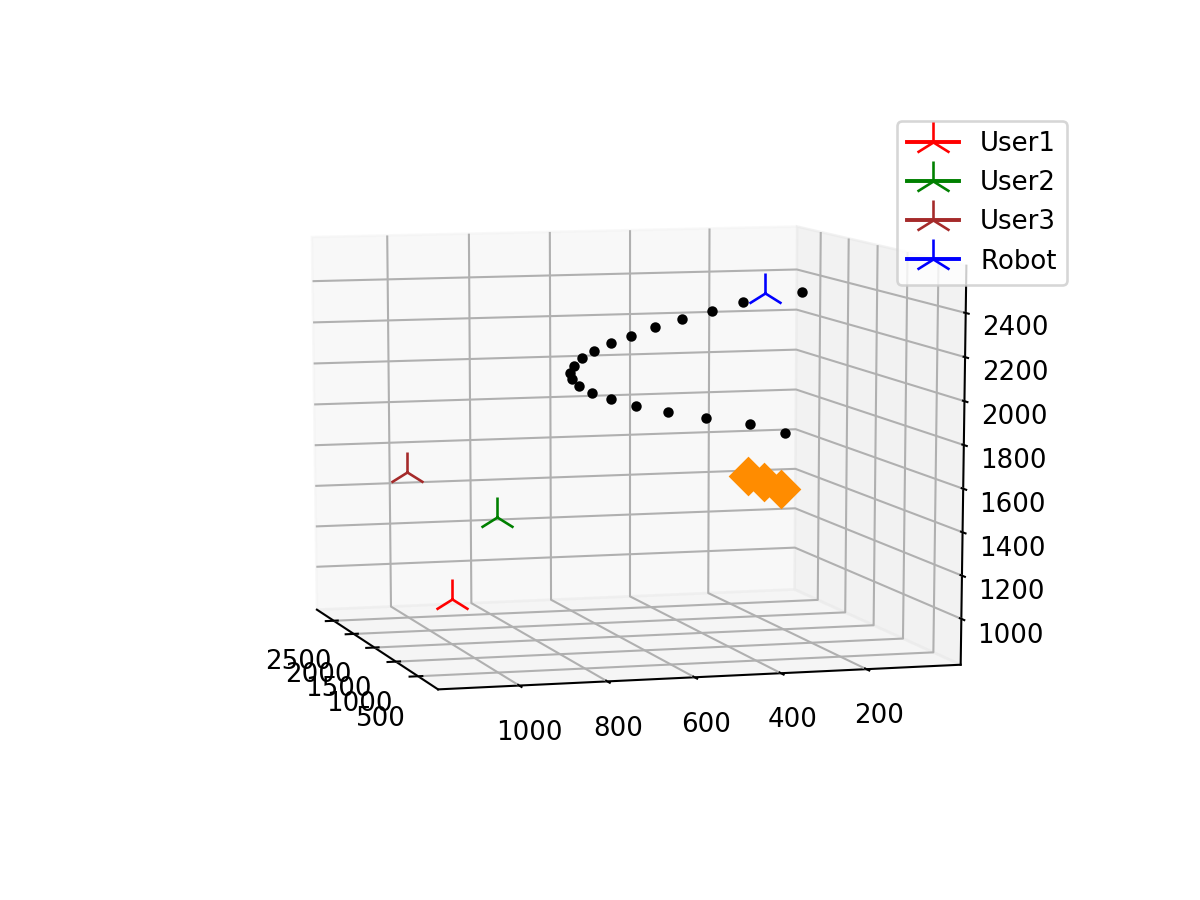

In [13]:
configuration = 'conf_1'
target = 'A'
optimization = 'all_users'

movement = movements[configuration][target][optimization]
fig = plt.figure('Optimal Trajectories Visual')
ax = fig.add_subplot(111, projection=Axes3D.name)
ax.plot(movement[:, 0], movement[:, 1], movement[:, 2], 'black', marker='.', linestyle="None")
ax.plot(np.array([user1_translation[0]]), np.array([user1_translation[1]]), np.array([user1_translation[2]]),
        color='red', marker='2', markersize=15, label='User1')
ax.plot(np.array([user2_translation[0]]), np.array([user2_translation[1]]), np.array([user2_translation[2]]),
        color='green', marker='2', markersize=15, label='User2')
ax.plot(np.array([user3_translation[0]]), np.array([user3_translation[1]]), np.array([user3_translation[2]]),
        color='brown', marker='2', markersize=15, label='User3')
ax.plot(np.array([robot_translation[0]]), np.array([robot_translation[1]]), np.array([robot_translation[2]]),
        color='blue', marker='2', markersize=15, label='Robot')
ax.plot(np.array([targets['A'][0]]), np.array([targets['A'][1]]), np.array([targets['A'][2]]),
        color='darkorange', marker='D', markersize=10)
ax.plot(np.array([targets['B'][0]]), np.array([targets['B'][1]]), np.array([targets['B'][2]]),
        color='darkorange', marker='D', markersize=10)
ax.plot(np.array([targets['C'][0]]), np.array([targets['C'][1]]), np.array([targets['C'][2]]),
        color='darkorange', marker='D', markersize=10)
plt.legend(loc='best')
#ax.view_init(azim=90, elev=-70)
fig.show()